## House Prices Linear Regression

## Contents

 1. **Introduction** <br> <br>
 2. **Goal Of The Project** <br><br>
 3. **General View of Data** <br>
     3.1. **Data Frames** <br>
     3.2. **Combining Test and Train Sets** <br> <br>
 4. **Data Cleaning** <br> 
     4.1. **Missing Values** <br> 
     4.2. **Data Imputing**  <br> <br>
 5. **Data Exploration** <br>
     5.1. **Exploring the Data**<br>
     5.2. **Encoding Ordinal Data**<br>
     5.3. **Outliers**<br><br>
 6. **Feature Engineering**<br>
     6.1. **Getting Dummies**<br>
     6.2. **Creating New Features**<br>
     6.3. **Creating Four Feature Categories**<br>
     6.4. **Principal Component Analysis**<br><br>
 7. **Building Models**<br>
     7.1. **Building Models From Feature Sets**<br>
     7.2. **Building Five New Models**<br><br>
 8. **Advanced Models**<br>
     8.1. **Improving Model 3**<br>
     8.2. **Ridge and Lasso Regularizations**<br><br>
 9. **Results**<br><br>

### 1. Introduction

In this project, we have worked on estimating house prices, which is a current problem. As it is known, the general practice to determine house prices is to allocate a valuation expert. However, rapidly increasing populations and number of dwelling houses force the emergence of some faster solutions. In this area like many areas, it was predicted that this process could be accelerated by machine learning methods and studies were conducted. Our project is one of them. Our aim is to prepare a predictive mathematical model and to estimate the prices of new houses using this model. We have house sales data for the past years from Ames. We have studied the data in this context. We created models using linear regression. Models created in this project are discussed in the project.



### 2. Goal of The Project

In this project, we are going to build a regression model for predicting house prices. Target variable is house prices, SalePrice column in data.

We have a dataset containing building feature records of 1460 house in Ames City. First we will start with explarotary data analysis. In following parts, we are going to evaluate a few linear regression models for predictions and compare them by predictive power of themselves.

### 3. General View of the Data:
We have 81 columns in data, but 'Id' column is not meaningful for us. So, we can say that train data has 80 variables, we are going to work with, and test data has 79 variables excluding SalePrice. We also have 1460 observation in our data.

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import decomposition, datasets
from sklearn.linear_model import Ridge, ElasticNet, Lasso, LassoLarsCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn import linear_model
import statsmodels.api as sm

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

###  3.1 Data Frames

In [2]:
train_1 = pd.read_csv('train.csv') # created for later purpose 
train_f = train_1.copy()
test_f = pd.read_csv('test.csv')

In [3]:
train_f.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_f.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### 3.2 Combining Train and Test Sets:


I have combined train and test sets because i want to clean and fill them with same methods.

In [6]:
train_f.drop(['Id'], axis=1, inplace=True)
test_f.drop(['Id'], axis=1, inplace=True)

In [7]:
train_f= train_f.drop(['SalePrice'], axis=1)
features = pd.concat([train_f, test_f]).reset_index(drop=True)

In [8]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non

### 4. Data Cleaning

### 4.1 Missing Values

Let's check how much missing value we have in dataset.

In [9]:
missing_data = pd.DataFrame(features.isnull().sum().reset_index())
missing_data.columns = ['index', 'missingcount']
missing_data = missing_data[missing_data['missingcount']>0]
missing_data['missingper'] = (missing_data['missingcount']/features.shape[0])*100
print('Missing Data \n', missing_data)

Missing Data 
            index  missingcount  missingper
1       MSZoning             4       0.137
2    LotFrontage           486      16.650
5          Alley          2721      93.217
8      Utilities             2       0.069
22   Exterior1st             1       0.034
23   Exterior2nd             1       0.034
24    MasVnrType            24       0.822
25    MasVnrArea            23       0.788
29      BsmtQual            81       2.775
30      BsmtCond            82       2.809
31  BsmtExposure            82       2.809
32  BsmtFinType1            79       2.706
33    BsmtFinSF1             1       0.034
34  BsmtFinType2            80       2.741
35    BsmtFinSF2             1       0.034
36     BsmtUnfSF             1       0.034
37   TotalBsmtSF             1       0.034
41    Electrical             1       0.034
46  BsmtFullBath             2       0.069
47  BsmtHalfBath             2       0.069
52   KitchenQual             1       0.034
54    Functional             2       0.

Alley, PoolQC, Fence, MiscFeature variables have too much missing values can not be filed, so i dropped them all.

In [10]:
features = features.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)

### 4.2 Data Imputing

Different methods have been used to fill the variables. After filling process, there will be no longer missing value in both train and test sets. Then we seperate train and test again.

In [11]:
features.LotFrontage = features.LotFrontage.fillna(features.LotFrontage.mode())

In [12]:
features.MasVnrType = features.MasVnrType.fillna(features.MasVnrType.mode())

In [13]:
features.MasVnrArea = features.MasVnrArea.fillna(0)

In [14]:
features.iloc[332, features.columns.get_loc('BsmtFinType2')] = features['BsmtFinType2'].mode()[0]
features.iloc[948, features.columns.get_loc('BsmtExposure')] = features['BsmtExposure'].mode()[0]

In [15]:
features.BsmtFinType2 = features.BsmtFinType2.fillna('None')
features.BsmtExposure = features.BsmtExposure.fillna('No')

In [16]:
features[['BsmtFinType1', 'BsmtCond','BsmtQual']] = features[['BsmtFinType1', 'BsmtCond','BsmtQual']].fillna('None')

In [17]:
features.Electrical = features.Electrical.fillna(features.Electrical.mode())

In [18]:
features.FireplaceQu = features.FireplaceQu.fillna('None')

In [19]:
garage = features[['GarageType','GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']]

In [20]:
for columns in garage:
    if features[columns].dtype == np.object:
        features[columns] = features[columns].fillna('None')
    else:
        features[columns] = features[columns].fillna(0)

In [21]:
# seperating train and test data

y = train_1.SalePrice
train = features.iloc[:len(y), :]
test =  features.iloc[len(y):, :]
print(train.shape[0], test.shape[0])

1460 1459


In [22]:
# add sale price to our train set again.

train['SalePrice'] = train_1.SalePrice

### 5. Data Exploration

### 5.1 Exploring the Data

#### Let's take a look at categorical and numerical features

In [23]:
print('Categorical Features: \n', train.select_dtypes(include = ['object']).columns)
print('--'*40)
print('Numeric Features: \n', train.select_dtypes(exclude = ['object']).columns)
print('--'*40)

Categorical Features: 
 Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
--------------------------------------------------------------------------------
Numeric Features: 
 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullB

#### Number of items in categorical features:

In [24]:
cat_features = train.select_dtypes(include = ['object'])
for cat in cat_features:
    print('--'*40)
    print(cat)
    print(train[cat].value_counts())

--------------------------------------------------------------------------------
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
--------------------------------------------------------------------------------
Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
--------------------------------------------------------------------------------
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
--------------------------------------------------------------------------------
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
--------------------------------------------------------------------------------
Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
--------------------------------------------------------------------------------
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Na

#### Visualizing categorical data:
Here, we can see frequency of items and Sale Price average and mode on plot for each item in a category. 

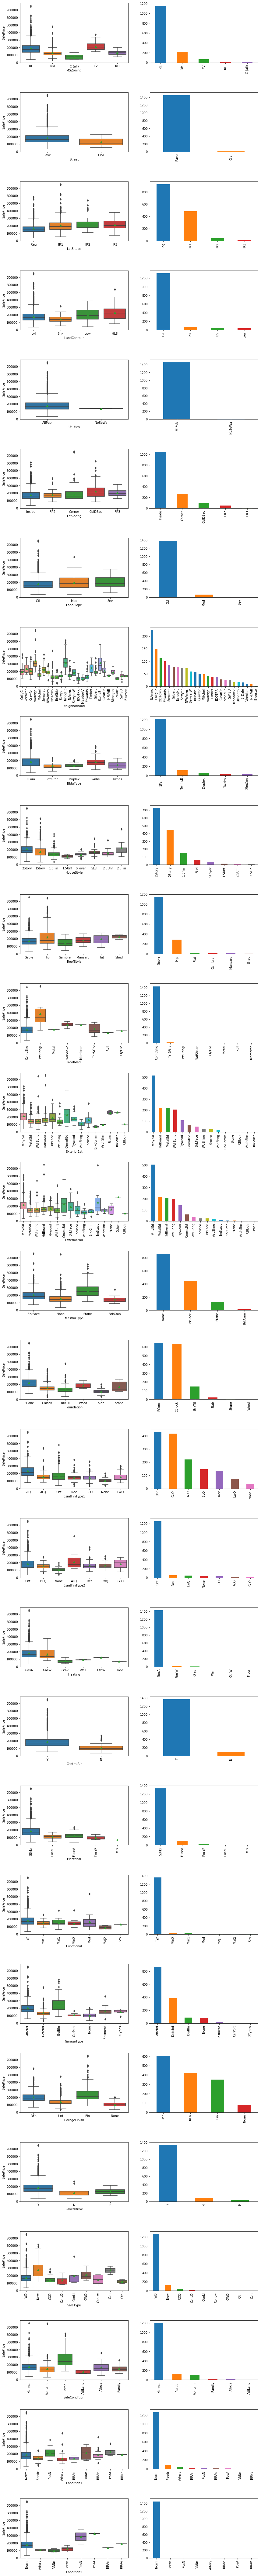

In [25]:
plt.figure(figsize = (14,160))

plt.subplot(30,2,1)
sns.boxplot(data = train, x = 'MSZoning', y = 'SalePrice', showmeans=True)
plt.subplot(30,2,2)
train.MSZoning.value_counts().plot(kind = 'bar')

plt.subplot(30,2,3)
sns.boxplot(data = train, x = 'Street', y = 'SalePrice', showmeans=True)
plt.subplot(30,2,4)
train.Street.value_counts().plot(kind = 'bar')

plt.subplot(30,2,5)
sns.boxplot(data = train, x = 'LotShape', y = 'SalePrice', showmeans=True)
plt.subplot(30,2,6)
train.LotShape.value_counts().plot(kind = 'bar')

plt.subplot(30,2,7)
sns.boxplot(data = train, x = 'LandContour', y = 'SalePrice', showmeans=True)
plt.subplot(30,2,8)
train.LandContour.value_counts().plot(kind = 'bar')

plt.subplot(30,2,9)
sns.boxplot(data = train, x = 'Utilities', y = 'SalePrice', showmeans=True)
plt.subplot(30,2,10)
train.Utilities.value_counts().plot(kind = 'bar')

plt.subplot(30,2,11)
sns.boxplot(data = train, x = 'LotConfig', y = 'SalePrice', showmeans=True)
plt.subplot(30,2,12)
train.LotConfig.value_counts().plot(kind = 'bar')

plt.subplot(30,2,13)
sns.boxplot(data = train, x = 'LandSlope', y = 'SalePrice', showmeans=True)
plt.subplot(30,2,14)
train.LandSlope.value_counts().plot(kind = 'bar')

plt.subplot(30,2,15)
sns.boxplot(data = train, x = 'Neighborhood', y = 'SalePrice', showmeans=True)
plt.xticks(rotation = 90)
plt.subplot(30,2,16)
train.Neighborhood.value_counts().plot(kind = 'bar')

plt.subplot(30,2,17)
sns.boxplot(data = train, x = 'BldgType', y = 'SalePrice', showmeans=True)
plt.subplot(30,2,18)
train.BldgType.value_counts().plot(kind = 'bar')

plt.subplot(30,2,19)
sns.boxplot(data = train, x = 'HouseStyle', y = 'SalePrice', showmeans=True)
plt.subplot(30,2,20)
train.HouseStyle.value_counts().plot(kind = 'bar')

plt.subplot(30,2,21)
sns.boxplot(data = train, x = 'RoofStyle', y = 'SalePrice', showmeans=True)
plt.subplot(30,2,22)
train.RoofStyle.value_counts().plot(kind = 'bar')

plt.subplot(30,2,23)
sns.boxplot(data = train, x = 'RoofMatl', y = 'SalePrice', showmeans=True)
plt.xticks(rotation = 90)
plt.subplot(30,2,24)
train.RoofMatl.value_counts().plot(kind = 'bar')

plt.subplot(30,2,25)
sns.boxplot(data = train, x = 'Exterior1st', y = 'SalePrice', showmeans=True)
plt.xticks(rotation = 90)
plt.subplot(30,2,26)
train.Exterior1st.value_counts().plot(kind = 'bar')

plt.subplot(30,2,27)
sns.boxplot(data = train, x = 'Exterior2nd', y = 'SalePrice', showmeans=True)
plt.xticks(rotation = 90)
plt.subplot(30,2,28)
train.Exterior2nd.value_counts().plot(kind = 'bar')

plt.subplot(30,2,29)
sns.boxplot(data = train, x = 'MasVnrType', y = 'SalePrice', showmeans=True)
plt.subplot(30,2,30)
train.MasVnrType.value_counts().plot(kind = 'bar')

plt.subplot(30,2,31)
sns.boxplot(data = train, x = 'Foundation', y = 'SalePrice', showmeans=True)
plt.subplot(30,2,32)
train.Foundation.value_counts().plot(kind = 'bar')

plt.subplot(30,2,33)
sns.boxplot(data = train, x = 'BsmtFinType1', y = 'SalePrice', showmeans=True)
plt.subplot(30,2,34)
train.BsmtFinType1.value_counts().plot(kind = 'bar')

plt.subplot(30,2,35)
sns.boxplot(data = train, x = 'BsmtFinType2', y = 'SalePrice', showmeans=True)
plt.subplot(30,2,36)
train.BsmtFinType2.value_counts().plot(kind = 'bar')

plt.subplot(30,2,37)
sns.boxplot(data = train, x = 'Heating', y = 'SalePrice', showmeans=True)
plt.subplot(30,2,38)
train.Heating.value_counts().plot(kind = 'bar')

plt.subplot(30,2,39)
sns.boxplot(data = train, x = 'CentralAir', y = 'SalePrice', showmeans=True)
plt.subplot(30,2,40)
train.CentralAir.value_counts().plot(kind = 'bar')

plt.subplot(30,2,41)
sns.boxplot(data = train, x = 'Electrical', y = 'SalePrice', showmeans=True)
plt.xticks(rotation = 90)
plt.subplot(30,2,42)
train.Electrical.value_counts().plot(kind = 'bar')

plt.subplot(30,2,43)
sns.boxplot(data = train, x = 'Functional', y = 'SalePrice', showmeans=True)
plt.xticks(rotation = 90)
plt.subplot(30,2,44)
train.Functional.value_counts().plot(kind = 'bar')

plt.subplot(30,2,45)
sns.boxplot(data = train, x = 'GarageType', y = 'SalePrice', showmeans=True)
plt.xticks(rotation = 90)
plt.subplot(30,2,46)
train.GarageType.value_counts().plot(kind = 'bar')

plt.subplot(30,2,47)
sns.boxplot(data = train, x = 'GarageFinish', y = 'SalePrice', showmeans=True)
plt.subplot(30,2,48)
train.GarageFinish.value_counts().plot(kind = 'bar')

plt.subplot(30,2,49)
sns.boxplot(data = train, x = 'PavedDrive', y = 'SalePrice', showmeans=True)
plt.subplot(30,2,50)
train.PavedDrive.value_counts().plot(kind = 'bar')

plt.subplot(30,2,51)
sns.boxplot(data = train, x = 'SaleType', y = 'SalePrice', showmeans=True)
plt.xticks(rotation = 90)
plt.subplot(30,2,52)
train.SaleType.value_counts().plot(kind = 'bar')

plt.subplot(30,2,53)
sns.boxplot(data = train, x = 'SaleCondition', y = 'SalePrice', showmeans=True)
plt.xticks(rotation = 90)
plt.subplot(30,2,54)
train.SaleCondition.value_counts().plot(kind = 'bar')

plt.subplot(30,2,55)
sns.boxplot(data = train, x = 'Condition1', y = 'SalePrice', showmeans=True)
plt.xticks(rotation = 90)
plt.subplot(30,2,56)
train.Condition1.value_counts().plot(kind = 'bar')

plt.subplot(30,2,57)
sns.boxplot(data = train, x = 'Condition2', y = 'SalePrice', showmeans=True)
plt.xticks(rotation = 90)
plt.subplot(30,2,58)
train.Condition2.value_counts().plot(kind = 'bar')
plt.subplots_adjust(hspace = 0.5)

plt.show()

#### Visualizing ordinary categorical data

Here, we can see number of  items, Sale Price mode and average values of each item in categories. But these categories are not only categorical datas. They are ordinary, it means that we can consider that they are kind of continuous variables. In later stages, we will deal with that case.

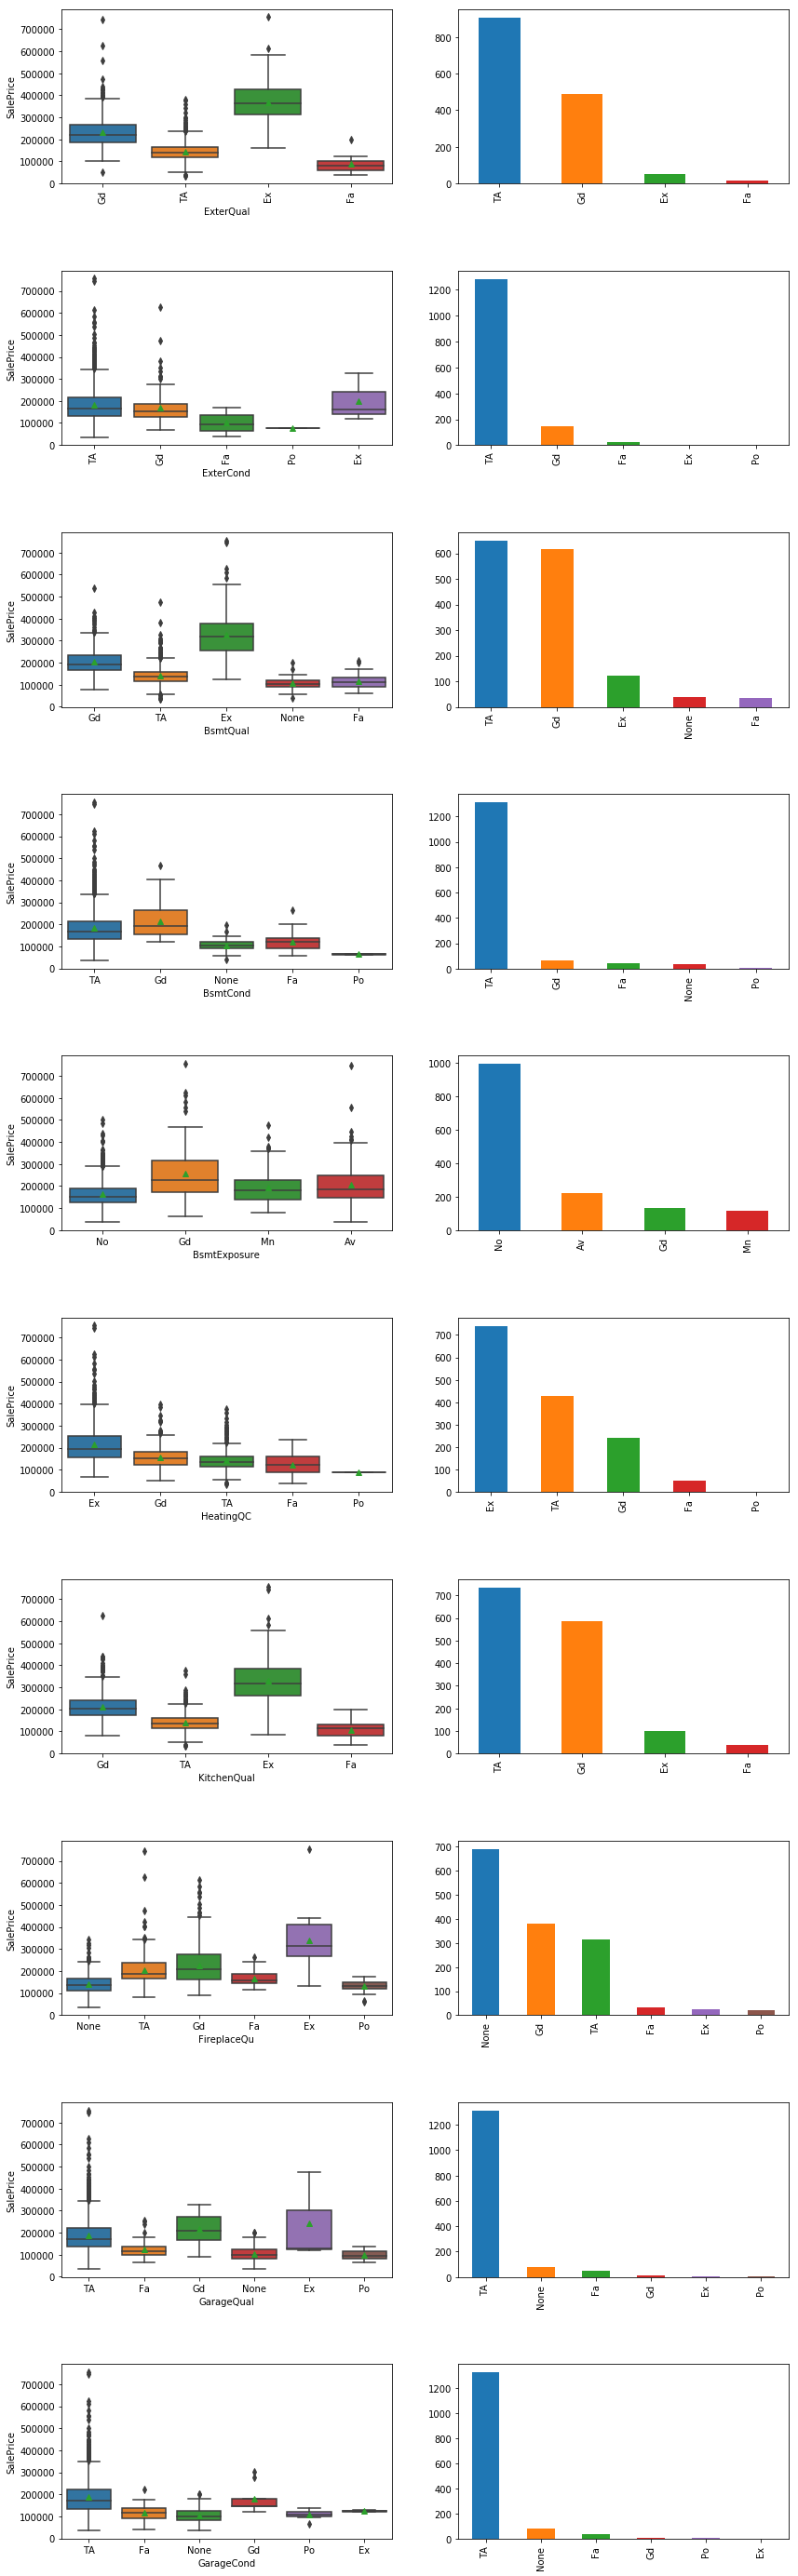

In [26]:
plt.figure(figsize=(14,50))

plt.subplot(10,2,1)
sns.boxplot(data = train, x = 'ExterQual', y = 'SalePrice', showmeans=True)
plt.xticks(rotation = 90)
plt.subplot(10,2,2)
train.ExterQual.value_counts().plot(kind = 'bar')

plt.subplot(10,2,3)
sns.boxplot(data = train, x = 'ExterCond', y = 'SalePrice', showmeans=True)
plt.xticks(rotation = 90)
plt.subplot(10,2,4)
train.ExterCond.value_counts().plot(kind = 'bar')

plt.subplot(10,2,5)
sns.boxplot(data = train, x = 'BsmtQual', y = 'SalePrice', showmeans=True)
plt.subplot(10,2,6)
train.BsmtQual.value_counts().plot(kind = 'bar')

plt.subplot(10,2,7)
sns.boxplot(data = train, x = 'BsmtCond', y = 'SalePrice', showmeans=True)
plt.subplot(10,2,8)
train.BsmtCond.value_counts().plot(kind = 'bar')

plt.subplot(10,2,9)
sns.boxplot(data = train, x = 'BsmtExposure', y = 'SalePrice', showmeans=True)
plt.subplot(10,2,10)
train.BsmtExposure.value_counts().plot(kind = 'bar')

plt.subplot(10,2,11)
sns.boxplot(data = train, x = 'HeatingQC', y = 'SalePrice', showmeans=True)
plt.subplot(10,2,12)
train.HeatingQC.value_counts().plot(kind = 'bar')

plt.subplot(10,2,13)
sns.boxplot(data = train, x = 'KitchenQual', y = 'SalePrice', showmeans=True)
plt.subplot(10,2,14)
train.KitchenQual.value_counts().plot(kind = 'bar')

plt.subplot(10,2,15)
sns.boxplot(data = train, x = 'FireplaceQu', y = 'SalePrice', showmeans=True)
plt.subplot(10,2,16)
train.FireplaceQu.value_counts().plot(kind = 'bar')

plt.subplot(10,2,17)
sns.boxplot(data = train, x = 'GarageQual', y = 'SalePrice', showmeans=True)
plt.subplot(10,2,18)
train.GarageQual.value_counts().plot(kind = 'bar')

plt.subplot(10,2,19)
sns.boxplot(data = train, x = 'GarageCond', y = 'SalePrice', showmeans=True)
plt.subplot(10,2,20)
train.GarageCond.value_counts().plot(kind = 'bar')

plt.subplots_adjust(hspace = 0.5)
plt.show()

### 5.2 Encoding Ordinal Data
Here, all ordinary categorical variables are encoded with numbers between 0 and 5. That method does not turn the ordinaries into numericals exactly but it might still work. 

In [27]:
train['ExterQual'] = train['ExterQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train['ExterCond'] = train['ExterCond'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train['BsmtQual'] = train['BsmtQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train['BsmtCond'] = train['BsmtCond'].map({'None':2,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train['BsmtExposure'] = train['BsmtExposure'].map({'No':0,'Mn':2,'Av':3,'Gd':4})
train['HeatingQC'] = train['HeatingQC'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train['KitchenQual'] = train['KitchenQual'].map({'None':train['KitchenQual'].mode(),'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train['FireplaceQu'] = train['FireplaceQu'].map({'None':2,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train['GarageQual'] = train['GarageQual'].map({'None':1,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train['GarageCond'] = train['GarageCond'].map({'None':1,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

#### Ordinary Categorical Variables Correlations

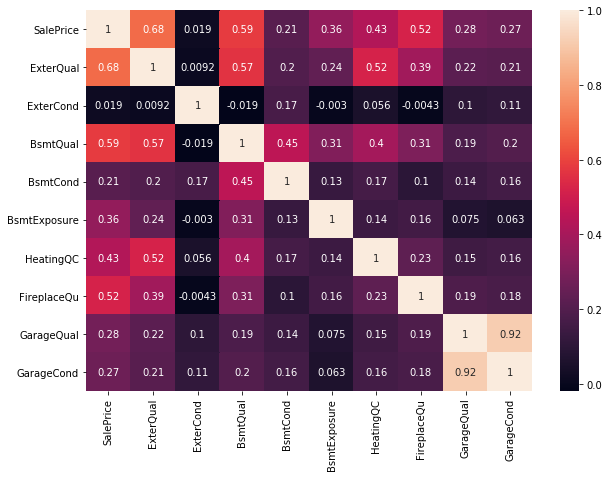

In [28]:
ordinaries = ['SalePrice','ExterQual', 'ExterCond','BsmtQual','BsmtCond', 
              'BsmtExposure', 'HeatingQC', 'KitchenQual', 
              'FireplaceQu','GarageQual', 'GarageCond']

plt.figure(figsize=(10,7))
sns.heatmap(train[ordinaries].corr(), annot = True)
plt.show()

In this correlation map, we can't say these values are completely true and meaningful because they were not continuous at the starting but it gives us a pre-inference about their importance after encoding. 

### 5.3 Outliers
We are trying to handle outliers of continuous variables here. We kept the winsorization only about 5% because it might cause some side effects if we increase that ratio too much. Cutting too much information may not be the best idea.  

By the way, some variables are not winsorized. Because most value of some variables are 0 and boxplots show the rest values are all overliers just because of rests are not 0, but they are not overliers.

In [29]:
numericals = train.select_dtypes(exclude = ['object']).columns
numericals

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [30]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
((train[numericals] < (Q1 - 1.5 * IQR)) | (train[numericals] > (Q3 + 1.5 * IQR))).sum()

MSSubClass       103
LotFrontage       88
LotArea           69
OverallQual        2
OverallCond      125
YearBuilt          7
YearRemodAdd       0
MasVnrArea        98
ExterQual          0
ExterCond        178
BsmtQual          37
BsmtCond         149
BsmtExposure       0
BsmtFinSF1         7
BsmtFinSF2       167
BsmtUnfSF         29
TotalBsmtSF       61
HeatingQC          0
1stFlrSF          20
2ndFlrSF           2
LowQualFinSF      26
GrLivArea         31
BsmtFullBath       1
BsmtHalfBath      82
FullBath           0
HalfBath           0
BedroomAbvGr      35
KitchenAbvGr      68
TotRmsAbvGrd      30
Fireplaces         5
FireplaceQu        0
GarageYrBlt       81
GarageCars         5
GarageArea        21
GarageQual       149
GarageCond       134
WoodDeckSF        32
OpenPorchSF       77
EnclosedPorch    208
3SsnPorch         24
ScreenPorch      116
PoolArea           7
MiscVal           52
MoSold             0
YrSold             0
SalePrice         61
dtype: int64

In [31]:
train.MSSubClass = winsorize(train.MSSubClass, 0.06)
train.LotFrontage = winsorize(train.LotFrontage, 0.05)
train.LotArea = winsorize(train.LotArea, 0.05)
train.OverallCond = winsorize(train.OverallCond, 0.06)
train.YearBuilt = winsorize(train.YearBuilt, 0.01 )
train.MasVnrArea = winsorize(train.MasVnrArea, 0.05 )
train.BsmtFinSF1 = winsorize(train.BsmtFinSF1, 0.01)
train.BsmtUnfSF = winsorize(train.BsmtUnfSF, 0.02)
train.ExterCond = winsorize(train.ExterCond, 0.01)
train.TotalBsmtSF = winsorize(train.TotalBsmtSF, 0.03)
train['1stFlrSF'] = winsorize(train['1stFlrSF'], 0.03)
train.GrLivArea = winsorize(train.GrLivArea, 0.03)
train.BedroomAbvGr = winsorize(train.BedroomAbvGr,0.02)
train.KitchenAbvGr = winsorize(train.KitchenAbvGr, 0.01)
train.TotRmsAbvGrd = winsorize(train.TotRmsAbvGrd, 0.03)
train.Fireplaces = winsorize(train.Fireplaces, 0.01)
train.GarageArea = winsorize(train.GarageArea, 0.015)
train.WoodDeckSF = winsorize(train.WoodDeckSF, 0.024)
train.OpenPorchSF = winsorize(train.OpenPorchSF,0.06)
train.MiscVal = winsorize(train.MiscVal, 0.01)
train.SalePrice = winsorize(train.SalePrice,(0, 0.042))

<Figure size 432x288 with 0 Axes>

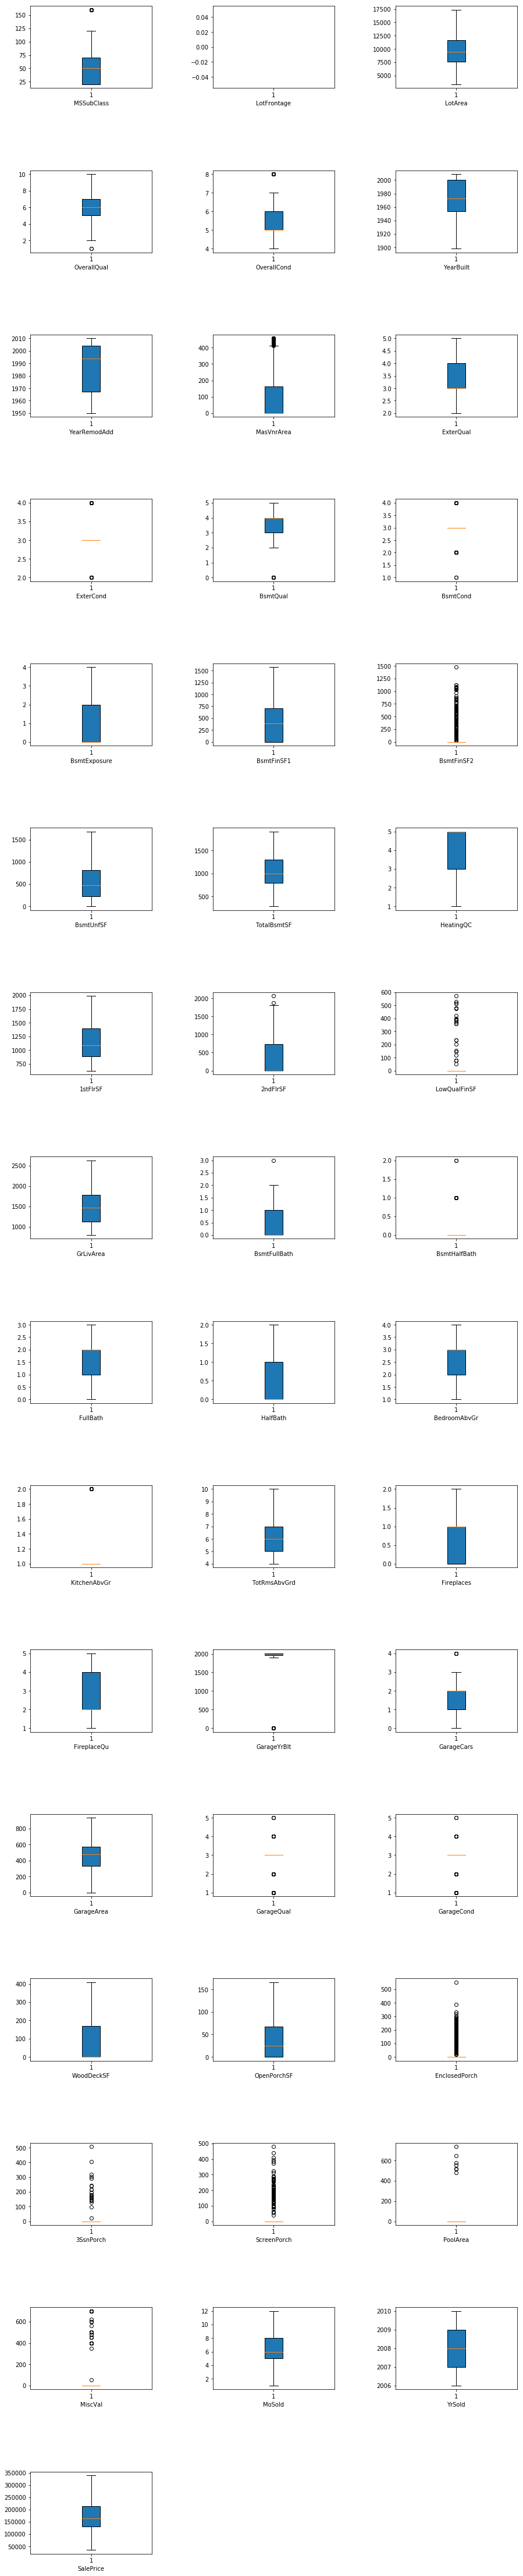

In [32]:
plt.subplots_adjust(bottom = 0.5, wspace = 0.2, hspace = 0.4)
plt.figure(figsize = (15,160))
for i in range(1,47):
    plt.subplots_adjust(bottom = 0.5, wspace = 0.5, hspace = 1)
    plt.subplot(16, 3, i)
    plt.xlabel(numericals[i-1])
    plt.boxplot(train[numericals[i-1]], patch_artist=True)
plt.show()

### 6. Feature Engineering

### 6.1 Getting Dummies

#### Turning categorical variables into dummies

Here, we concatenate train and test sets. So we can get dummies of all together.

In [33]:
final_train = train.drop(columns = ['SalePrice'])

In [34]:
final_test = test

In [35]:
final_features = pd.concat([final_train, final_test]).reset_index(drop=True)

In [36]:
final_features = pd.get_dummies(final_features).reset_index(drop = True)
final_features.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.000,8450,7,5,2003,2003,196.000,706.000,0.000,...,0,0,0,1,0,0,0,0,1,0
1,20,80.000,9600,6,8,1976,1976,0.000,978.000,0.000,...,0,0,0,1,0,0,0,0,1,0
2,60,68.000,11250,7,5,2001,2002,162.000,486.000,0.000,...,0,0,0,1,0,0,0,0,1,0
3,70,60.000,9550,7,5,1915,1970,0.000,216.000,0.000,...,0,0,0,1,1,0,0,0,0,0
4,60,84.000,14260,8,5,2000,2000,350.000,655.000,0.000,...,0,0,0,1,0,0,0,0,1,0


Let's seperate train and test sets again and add th ordinal variables to our new train set.

In [37]:
last_train = final_features.iloc[:1460, :]
last_test = final_features.iloc[1460:,:]

In [38]:
last_train['BsmtQual'] = train.BsmtQual
last_train['BsmtCond'] = train.BsmtCond
last_train['GarageQual'] = train.GarageQual
last_train['HeatingQC'] = train.HeatingQC
last_train['FireplaceQu'] = train.FireplaceQu
last_train['BsmtExposure'] = train.BsmtExposure
last_train['FireplaceQu'] = train.FireplaceQu
last_train['ExterQual'] = train.ExterQual
last_train['KitchenQual'] = train.KitchenQual
last_train['GarageCond'] = train.GarageCond
last_train['SalePrice'] = train.SalePrice
last_train['ExterQual'] = train.ExterQual
last_train['ExterCond'] = train.ExterCond

In [39]:
# just a forgotten detail

last_train.LotFrontage = last_train.LotFrontage.fillna(last_train.LotFrontage.mean())

### 6.2 Creating New Features
We already have some variables to explain our data for our prediction model but we can create more from existing variables. Some of our new features may help us to build better models. If they do not, we do no use them, that's all. So, the more the better.

In [40]:
# combinations of existing features

last_train['AllSF'] = last_train.GrLivArea + last_train.TotalBsmtSF # total square feet
last_train['AllFloorSF'] = last_train['1stFlrSF'] + last_train['2ndFlrSF']
last_train['TotalPorch'] = last_train.OpenPorchSF + last_train.EnclosedPorch
+ last_train['3SsnPorch'] + last_train.ScreenPorch # total porch sf
last_train['Rooms'] = last_train.TotRmsAbvGrd + last_train.FullBath + last_train.HalfBath #total rooms
last_train['Bathrooms'] = last_train.FullBath + last_train.HalfBath + last_train.BsmtFullBath + last_train.BsmtHalfBath #total baths
last_train['AreaByRoom'] = last_train.GrLivArea/ last_train.Rooms # area per room
last_train['OveralQualCond'] = last_train.OverallCond + last_train.OverallQual # overal grade 1
last_train['OveralQualCond2'] = last_train.OverallCond * last_train.OverallQual # overall grade 2
last_train['GarageQualCond'] = last_train.GarageArea + last_train.GarageCond #overall garage grade 1
last_train['GarageQualCond2'] = last_train.GarageArea * last_train.GarageCond #overall garage grade 2
last_train['GarageScore'] = last_train.GarageQual * last_train.GarageArea
last_train['GarageAreaCar'] = last_train.GarageArea + last_train.GarageCars 
last_train['ExterGrade'] = last_train.ExterCond * last_train.ExterQual
last_train['KitchenScore'] = last_train.KitchenAbvGr * train.KitchenQual
last_train['FirePlaceScore'] = last_train.Fireplaces * last_train.FireplaceQu

In [41]:
# simple editions of quality and condition features

last_train["SimplOverallQual"] = last_train.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
last_train["SimplOverallCond"] = last_train.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
last_train["SimplGarageCond"] = last_train.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
last_train["SimplGarageQual"] = last_train.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
last_train["SimplFireplaceQu"] = last_train.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
last_train["SimplFireplaceQu"] = last_train.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
last_train["SimplKitchenQual"] = last_train.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
last_train["SimplHeatingQC"] = last_train.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
last_train["SimplBsmtCond"] = last_train.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
last_train["SimplBsmtQual"] = last_train.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
last_train["SimplExterCond"] = last_train.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
last_train["SimplExterQual"] = last_train.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })


In [42]:
# combinations of simplified features

last_train["SimplOverallGrade"] = last_train["SimplOverallQual"] * last_train["SimplOverallCond"]
last_train["SimplExterGrade"] = last_train["SimplExterQual"] * last_train["SimplExterCond"]
last_train["SimplGarageScore"] = last_train["GarageArea"] * last_train["SimplGarageQual"]
last_train["SimplFireplaceScore"] = last_train["Fireplaces"] * last_train["SimplFireplaceQu"]
last_train["SimplKitchenScore"] = last_train["KitchenAbvGr"] * last_train["SimplKitchenQual"]

In [43]:
# new polinomial features

last_train["OverallQual-s2"] = last_train["OverallQual"] ** 2
last_train["OverallQual-s3"] = last_train["OverallQual"] ** 3
last_train["OverallQual-Sq"] = last_train["OverallQual"] ** 0.5
last_train["AllSF-2"] = last_train["AllSF"] ** 2
last_train["AllSF-3"] = last_train["AllSF"] ** 3
last_train["AllSF-Sq"] = last_train["AllSF"] ** 0.5
last_train["AllFlrsSF-2"] = last_train["AllFloorSF"] ** 2
last_train["AllFlrsSF-3"] = last_train["AllFloorSF"] ** 3
last_train["AllFlrsSF-Sq"] = last_train["AllFloorSF"] ** 0.5
last_train["GrLivArea-2"] = last_train["GrLivArea"] ** 2
last_train["GrLivArea-3"] = last_train["GrLivArea"] ** 3
last_train["GrLivArea-Sq"] = last_train["GrLivArea"] ** 0.5
last_train["SimplOverallQual-s2"] = last_train["SimplOverallQual"] ** 2
last_train["SimplOverallQual-s3"] = last_train["SimplOverallQual"] ** 3
last_train["SimplOverallQual-Sq"] = last_train["SimplOverallQual"] ** 0.5
last_train["ExterQual-2"] = last_train["ExterQual"] ** 2
last_train["ExterQual-3"] = last_train["ExterQual"] ** 3
last_train["ExterQual-Sq"] = last_train["ExterQual"] ** 0.5
last_train["GarageCars-2"] = last_train["GarageCars"] ** 2
last_train["GarageCars-3"] = last_train["GarageCars"] ** 3
last_train["GarageCars-Sq"] = last_train["GarageCars"] ** 0.5
last_train["TotalBath-2"] = last_train["Bathrooms"] ** 2
last_train["TotalBath-3"] = last_train["Bathrooms"] ** 3
last_train["TotalBath-Sq"] = last_train["Bathrooms"] ** 0.5
last_train["KitchenQual-2"] = last_train["KitchenQual"] ** 2
last_train["KitchenQual-3"] = last_train["KitchenQual"] ** 3
last_train["KitchenQual-Sq"] = last_train["KitchenQual"] ** 0.5
last_train["GarageScore-2"] = last_train["GarageScore"] ** 2
last_train["GarageScore-3"] = last_train["GarageScore"] ** 3
last_train["GarageScore-Sq"] = np.sqrt(last_train["GarageScore"])

### 6.3 Creating Four Feature Categories

* Quality 
* Location 
* Space 
* Building

We have created these categories to build models for each one of them. We are going to explore their power and predictive accuracy respectively. This might not be needed for only prediction purpose but we made that in this project, because we want to see effects of features on sale price individually. Let's find the columns of each category. 

#### Space features

In [44]:
last_columns = last_train.columns

In [45]:
space_features = []
for i in range(len(last_columns)):
    
    if (('Area') in 
        last_columns[i]) or (('Porch') in 
                             last_columns[i]) or (('Bath') in 
                                                  last_columns[i]) or (('Room') in 
                                                                       last_columns[i]) or (('Car') in last_columns[i]) :
        space_features.append(last_columns[i])
    elif (('SF') in last_columns[i]) or (('Abv') in last_columns[i]) :
        space_features.append(last_columns[i])
del(space_features[25:27])

In [46]:
print('Number of items in Space features:', len(space_features))

Number of items in Space features: 47


#### Quality features

In [47]:
qual_features = []
for i in range(len(last_columns)):
    
    if (('Qual') 
        in last_columns[i]) or (('Cond') 
                                in last_columns[i]) or (('Exposure') 
                                                        in last_columns[i]) or (('Qu') 
                                                                                in last_columns[i]) or (('QC') 
                                                                                                        in last_columns[i]) or (('Grade') in 
                                                                                                                                last_columns[i]) or (('Score') in last_columns[i]):
        qual_features.append(last_columns[i])

In [48]:
print('Number of items in Quality features:', len(qual_features))

Number of items in Quality features: 168


#### Location features

In [49]:
locations = ['MSZ','Street' ,'Alley' ,'Lot', 'Land','LotConfig', 'Neighborhood']

In [50]:
location_features = []

for i in range(len(last_columns)):
    
    for j in range(len(locations)):
        
        if locations[j] in last_columns[i]:
            location_features.append(last_columns[i])

In [51]:
print('Number of items in Location features:', len(location_features))

Number of items in Location features: 56


#### Building features

In [52]:
selected = location_features + space_features + qual_features

In [53]:
unselected = []
for i in range(len(last_columns)):
    if last_columns[i] not in selected:
        unselected.append(last_columns[i]) 

In [54]:
building_features = unselected

In [55]:
print('Number of items in Building features:', len(building_features))

Number of items in Building features: 136


In [56]:
print('Total number of features in 4 category:',(len(building_features + location_features + space_features + qual_features)))

Total number of features in 4 category: 407


In [57]:
space_qual = []
for i in range(len(space_features)):
    if space_features[i] in qual_features:
        space_qual.append(space_features[i])
space_qual

['LowQualFinSF']

In [58]:
qual_features.remove('LowQualFinSF')

In [59]:
space_location = []
for i in range(len(space_features)):
    if space_features[i] in location_features:
        space_location.append(space_features[i])
space_location

['LotArea']

In [60]:
location_features.remove('LotArea')

In [61]:
qual_location = []
for i in range(len(qual_features)):
    if qual_features[i] in location_features:
        qual_location.append(qual_features[i])
qual_location

['SaleCondition_AdjLand']

In [62]:
location_features.remove('SaleCondition_AdjLand')

In [63]:
print('Total number of features in 4 category after coincidences are deleted:',
      (len(building_features + location_features + space_features + qual_features)))

Total number of features in 4 category after coincidences are deleted: 404


All feature categories have been created as lists. We will build linear models with using them later.

### 6.4 Principal Component Analysis

Here, we made principal component analysis. This analysis shows us how much variance can be explained by how many features. At the end of this section, we will see that we must use 169 features to explain 95% of total variance. The idea is can be inferenced from here, model including 169 features are better than model including 404 features. It may have less explained variance but it will be pretty faster. We call it trade-off.    

In [64]:
last_all = building_features + location_features + space_features + qual_features

In [65]:
# Standardize the feature matrix
X = StandardScaler().fit_transform(last_train[last_all].dropna())

# Create a PCA that will retain 95% of the variance
pca = PCA(n_components=0.95, whiten=True)

# Conduct PCA
X_pca = pca.fit_transform(X)

In [66]:
# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 404
Reduced number of features: 169


In [67]:
# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the features and transform
X_std = sc.fit_transform(X)

In [68]:
# Create a pca object with the 169 components as a parameter
pca = decomposition.PCA(n_components=169)

# Fit the PCA and transform the data
X_std_pca = pca.fit_transform(X_std)

# View the new feature data's shape
X_std_pca.shape

(1460, 169)

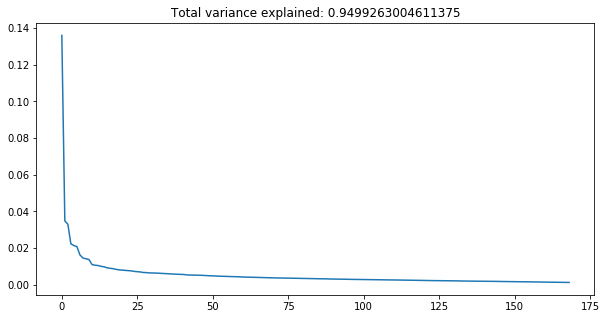

In [69]:
plt.figure(figsize = (10,5))
plt.plot(pca.explained_variance_ratio_)
plt.title('Total variance explained: {}'.format(pca.explained_variance_ratio_.sum()))
plt.show()

* PCA with 169 variables can explain of 95% of total variance.

### 7. Building Models

### 7.1 Building Models from Feature Sets

These models contain location features, space features, quality features and building features seperately.

#### Location Features Model

In [70]:
X_location = last_train[location_features]
Y = last_train.SalePrice

In [71]:
# dropping highly correlated variables
corr_matrix = X_location.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
X_location = X_location.drop(columns = to_drop, axis=1)

In [72]:
X_location = X_location.drop(columns = ['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'Street_Grvl', 
                      'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandSlope_Sev',
                     'Neighborhood_Blueste', 'Neighborhood_Gilbert', 'Neighborhood_NPkVill',
                     'Neighborhood_NWAmes','Neighborhood_SawyerW', 'LandSlope_Gtl', 'LandContour_Low',
                     'Neighborhood_SWISU', 'Neighborhood_ClearCr',
                     'LotShape_IR2','LotShape_IR1'], axis = 1)

X_train_loc, X_test_loc, y_train_loc, y_test_loc = train_test_split(X_location, 
                                                    Y, 
                                                    test_size=0.2, 
                                                    random_state=1)

X_train_loc = sm.add_constant(X_train_loc)
X_test_loc = sm.add_constant(X_test_loc)

results_location = sm.OLS(y_train_loc,X_train_loc).fit()
y_preds_loc = results_location.predict(X_test_loc)
results_location.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     74.10
Date:                Fri, 10 May 2019   Prob (F-statistic):          3.15e-213
Time:                        15:28:10   Log-Likelihood:                -14083.
No. Observations:                1168   AIC:                         2.822e+04
Df Residuals:                    1143   BIC:                         2.834e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  9.52e+04   9796.126      9.718      0.000     7.6e+04    1.14e+05
LotFrontage            575.2965     62.072      9.268      0.000     453.509     697.084
MSZoning_RL           3.516e+04   7570.321      4.645      0.000    2.03e+04       5e+04
MSZoning_RM            3.29e+04   8809.576      3.735      0.000    1.56e+04    5.02e+04
LandContour_HLS       3.069e+04   8884.921      3.454      0.001    1.33e+04    4.81e+04
LandContour_Lvl       1.574e+04   5481.074      2.872      0.004    4987.014    2.65e+04
LandSlope_Mod         2.028e+04   7020.962      2.889      0.004    6507.584    3.41e+04
Neighborhood_Blmngtn  2.354e+04   1.26e+04      1.870      0.062   -1155.860    4.82e+04
Neighborhood_BrDale  -6.124e+04   1.43e+04     -4.285      0.000   -8.93e+04   -3.32e+04
Neighborhood_BrkSide -5.475e+04   7358.678     -7.440      0.000   -6.92e+04   -4.03e+04
Neighborhood_CollgCr  9404.6088   4722.702      1.991      0.047     138.471    1.87e+04
Neighborhood_Crawfor  2.162e+04   7257.939      2.978      0.003    7374.724    3.59e+04
Neighborhood_Edwards -5.508e+04   5579.063     -9.873      0.000    -6.6e+04   -4.41e+04
Neighborhood_IDOTRR  -7.271e+04   9916.581     -7.332      0.000   -9.22e+04   -5.33e+04
Neighborhood_MeadowV -7.474e+04   1.38e+04     -5.420      0.000   -1.02e+05   -4.77e+04
Neighborhood_Mitchel -2.831e+04   7703.825     -3.675      0.000   -4.34e+04   -1.32e+04
Neighborhood_NAmes    -4.19e+04   4265.708     -9.822      0.000   -5.03e+04   -3.35e+04
Neighborhood_NoRidge  9.929e+04   8016.848     12.385      0.000    8.36e+04    1.15e+05
Neighborhood_NridgHt  9.352e+04   6080.173     15.382      0.000    8.16e+04    1.05e+05
Neighborhood_OldTown -5.143e+04   7182.043     -7.161      0.000   -6.55e+04   -3.73e+04
Neighborhood_Sawyer  -5.061e+04   6331.867     -7.993      0.000    -6.3e+04   -3.82e+04
Neighborhood_Somerst  6.315e+04   7801.166      8.095      0.000    4.78e+04    7.85e+04
Neighborhood_StoneBr  8.897e+04   9643.869      9.226      0.000    7.01e+04    1.08e+05
Neighborhood_Timber   4.753e+04   8203.640      5.793      0.000    3.14e+04    6.36e+04
Neighborhood_Veenker  3.374e+04   1.44e+04      2.349      0.019    5556.775    6.19e+04
==============================================================================
Omnibus:                      105.300   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.738
Skew:                           0.582   Prob(JB):                     3.48e-45
Kurtosis:                       4.689   Cond. No.                     1.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condit

#### Space Features Model

In [73]:
X_space = last_train[space_features]
Y = last_train.SalePrice

In [74]:
corr_matrix2 = X_space.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix2.where(np.triu(np.ones(corr_matrix2.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop2 = [column for column in upper.columns if any(upper[column] > 0.95)]

In [75]:
X_space = X_space.drop(columns = to_drop2, axis=1)

In [76]:
X_space = X_space.drop(columns = ['1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath' , 'HalfBath', 
                                 'TotRmsAbvGrd', '3SsnPorch', 'PoolArea', 'TotalPorch',
                                 'AreaByRoom',
                                 'GarageCars-Sq', 'TotalBsmtSF','MasVnrArea','BsmtHalfBath','ScreenPorch'] , axis=1)

In [77]:
X_train_space, X_test_space, y_train_space, y_test_space = train_test_split(X_space, Y, test_size = 0.2,
                                                                           random_state = 2)

X_train_space = sm.add_constant(X_train_space)
X_test_space = sm.add_constant(X_test_space)

results_space = sm.OLS(y_train_space, X_train_space).fit()
y_preds_space = results_space.predict(X_test_space)
results_space.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     327.1
Date:                Fri, 10 May 2019   Prob (F-statistic):               0.00
Time:                        15:28:10   Log-Likelihood:                -13630.
No. Observations:                1168   AIC:                         2.729e+04
Df Residuals:                    1151   BIC:                         2.738e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.403e+04   6748.630      8.006      0.000    4.08e+04    6.73e+04
LotArea           0.9462      0.287      3.292      0.001       0.382       1.510
BsmtFinSF1       -8.9981      4.121     -2.183      0.029     -17.084      -0.912
BsmtFinSF2      -31.6540      6.327     -5.003      0.000     -44.068     -19.240
BsmtUnfSF       -23.0089      4.407     -5.221      0.000     -31.656     -14.362
LowQualFinSF    -86.6024     18.045     -4.799      0.000    -122.007     -51.198
FullBath       1.201e+04   2345.037      5.123      0.000    7411.914    1.66e+04
BedroomAbvGr  -1.008e+04   1439.086     -7.005      0.000   -1.29e+04   -7257.310
KitchenAbvGr    -5.3e+04   4389.026    -12.076      0.000   -6.16e+04   -4.44e+04
GarageCars    -9285.8633   4460.832     -2.082      0.038    -1.8e+04    -533.589
GarageArea       22.3030      9.379      2.378      0.018       3.900      40.706
WoodDeckSF       27.3589      7.750      3.530      0.000      12.154      42.564
OpenPorchSF      40.8346     17.682      2.309      0.021       6.141      75.528
EnclosedPorch   -36.6946     14.799     -2.480      0.013     -65.731      -7.659
AllSF            63.1493      3.086     20.460      0.000      57.094      69.205
Bathrooms      5606.5709   1513.276      3.705      0.000    2637.483    8575.659
GarageCars-2   6926.3905   1076.091      6.437      0.000    4815.071    9037.710
==============================================================================
Omnibus:                      198.432   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1130.249
Skew:                          -0.651   Prob(JB):                    3.71e-246
Kurtosis:                       7.640   Cond. No.                     9.89e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Building Features Model

In [78]:
building_features_2 = ['YearBuilt', 'YearRemodAdd','Fireplaces','GarageYrBlt','RoofMatl_ClyTile','MasVnrType_Stone',
             'GarageType_2Types','GarageType_Attchd','GarageType_Basment','GarageType_BuiltIn','GarageType_CarPort'
             ,'GarageType_Detchd','GarageFinish_Fin','GarageFinish_RFn','GarageFinish_Unf']

In [79]:
X_building = last_train[building_features_2]
Y = last_train.SalePrice

In [80]:
corr_matrix3 = X_building.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix3.where(np.triu(np.ones(corr_matrix3.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop3 = [column for column in upper.columns if any(upper[column] > 0.95)]

X_building = X_building.drop(columns = to_drop3, axis=1)

In [81]:
X_train_building, X_test_building, y_train_building, y_test_building = train_test_split(X_building, Y, test_size = 0.2,
                                                                           random_state = 2)

X_train_building = sm.add_constant(X_train_building)
X_test_building = sm.add_constant(X_test_building)

results_building = sm.OLS(y_train_building, X_train_building).fit()
y_preds_building = results_building.predict(X_test_building)
results_building.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     136.5
Date:                Fri, 10 May 2019   Prob (F-statistic):          5.89e-233
Time:                        15:28:11   Log-Likelihood:                -14059.
No. Observations:                1168   AIC:                         2.815e+04
Df Residuals:                    1153   BIC:                         2.822e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.871e+06   2.07e+05     -9.045      0.000   -2.28e+06   -1.47e+06
YearBuilt            207.6552     79.407      2.615      0.009      51.857     363.454
YearRemodAdd         794.1181     77.719     10.218      0.000     641.631     946.605
Fireplaces          3.664e+04   2063.085     17.762      0.000    3.26e+04    4.07e+04
GarageYrBlt          339.4609     91.727      3.701      0.000     159.490     519.432
RoofMatl_ClyTile   -1.517e+05   4.15e+04     -3.659      0.000   -2.33e+05   -7.04e+04
MasVnrType_Stone    3.079e+04   4642.738      6.632      0.000    2.17e+04    3.99e+04
GarageType_2Types  -2.132e+05   6.23e+04     -3.423      0.001   -3.35e+05    -9.1e+04
GarageType_Attchd  -2.013e+05   5.99e+04     -3.361      0.001   -3.19e+05   -8.38e+04
GarageType_Basment -2.254e+05   6.05e+04     -3.727      0.000   -3.44e+05   -1.07e+05
GarageType_BuiltIn  -1.96e+05   6.02e+04     -3.254      0.001   -3.14e+05   -7.78e+04
GarageType_CarPort -2.276e+05   6.19e+04     -3.679      0.000   -3.49e+05   -1.06e+05
GarageType_Detchd  -2.108e+05   6.03e+04     -3.494      0.000   -3.29e+05   -9.24e+04
GarageFinish_Fin   -4.128e+05    1.2e+05     -3.435      0.001   -6.49e+05   -1.77e+05
GarageFinish_RFn   -4.243e+05    1.2e+05     -3.535      0.000    -6.6e+05   -1.89e+05
GarageFinish_Unf    -4.37e+05    1.2e+05     -3.653      0.000   -6.72e+05   -2.02e+05
==============================================================================
Omnibus:                       52.332   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.084
Skew:                           0.497   Prob(JB):                     8.97e-14
Kurtosis:                       3.497   Cond. No.                     2.48e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.16e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Quality Features Model

In [82]:
quality_2 = ['OverallQual', 'OverallCond','Condition1_Artery','Condition1_PosN','Condition2_PosN',
            'BsmtQual_0','BsmtQual_4',
            'BsmtQual_Ex','BsmtCond_Gd','BsmtExposure_0',
            'BsmtExposure_4','FireplaceQu_3','BsmtQual',
            'ExterQual','OveralQualCond','GarageQualCond']

In [83]:
X_quality = last_train[quality_2]
Y = last_train.SalePrice

In [84]:
corr_matrix4 = X_quality.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix4.where(np.triu(np.ones(corr_matrix4.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop4 = [column for column in upper.columns if any(upper[column] > 0.95)]

X_quality = X_quality.drop(columns = to_drop4, axis=1)

In [85]:
X_train_quality, X_test_quality, y_train_quality, y_test_quality = train_test_split(X_quality, Y,
                                                                                   test_size = 0.2, random_state = 3)

X_train_quality = sm.add_constant(X_train_quality)
X_test_quality = sm.add_constant(X_test_quality)
results_quality = sm.OLS(y_train_quality, X_train_quality.astype(float)).fit()

y_preds_quality = results_quality.predict(X_test_quality)
results_quality.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     328.2
Date:                Fri, 10 May 2019   Prob (F-statistic):               0.00
Time:                        15:28:11   Log-Likelihood:                -13748.
No. Observations:                1168   AIC:                         2.752e+04
Df Residuals:                    1154   BIC:                         2.760e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.461e+05   9778.962    -14.941      0.000   -1.65e+05   -1.27e+05
OverallQual        1.265e+04    840.439     15.056      0.000     1.1e+04    1.43e+04
OverallCond       -3734.0056    782.258     -4.773      0.000   -5268.813   -2199.198
Condition1_Artery  -1.71e+04   5260.099     -3.250      0.001   -2.74e+04   -6776.028
Condition1_PosN    2.431e+04   8509.431      2.857      0.004    7612.319     4.1e+04
Condition2_PosN   -1.262e+05   2.41e+04     -5.226      0.000   -1.74e+05   -7.88e+04
BsmtQual_0          5.61e+04   8834.477      6.350      0.000    3.88e+04    7.34e+04
BsmtQual_4         -1.23e+04   2326.010     -5.287      0.000   -1.69e+04   -7733.313
BsmtQual_Ex        1.476e-11   3.55e-12      4.152      0.000    7.78e-12    2.17e-11
BsmtCond_Gd       -2.728e-12   8.03e-13     -3.397      0.001    -4.3e-12   -1.15e-12
BsmtExposure_0    -4753.7552   2305.051     -2.062      0.039   -9276.316    -231.195
BsmtExposure_4     1.964e+04   3602.661      5.450      0.000    1.26e+04    2.67e+04
FireplaceQu_3       1.39e+04   2347.756      5.919      0.000    9289.432    1.85e+04
BsmtQual           1.952e+04   2247.654      8.686      0.000    1.51e+04    2.39e+04
ExterQual          1.712e+04   2460.217      6.960      0.000    1.23e+04    2.19e+04
OveralQualCond     8919.6978    466.901     19.104      0.000    8003.628    9835.768
GarageQualCond       82.8618      5.682     14.584      0.000      71.714      94.010
==============================================================================
Omnibus:                       69.084   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.511
Skew:                           0.438   Prob(JB):                     1.12e-26
Kurtosis:                       4.299   Cond. No.                     8.99e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.87e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Visualizing the four category based models
We have built the models. Now we are going to visualize and compare them.

In [86]:
MAE_location = mean_absolute_error(y_test_loc, y_preds_loc)
MSE_location = mse(y_test_loc, y_preds_loc)
RMSE_location = rmse(y_test_loc, y_preds_loc)
MAPE_location = np.mean(np.abs((y_test_loc - y_preds_loc) / y_test_loc)) * 100

MAE_space = mean_absolute_error(y_test_space, y_preds_space)
MSE_space = mse(y_test_space, y_preds_space)
RMSE_space = rmse(y_test_space, y_preds_space)
MAPE_space = np.mean(np.abs((y_test_space - y_preds_space) / y_test_space)) * 100

MAE_building = mean_absolute_error(y_test_building, y_preds_building)
MSE_building = mse(y_test_building, y_preds_building)
RMSE_building = rmse(y_test_building, y_preds_building)
MAPE_building = np.mean(np.abs((y_test_building - y_preds_building) / y_test_building)) * 100

MAE_quality = mean_absolute_error(y_test_quality, y_preds_quality)
MSE_quality = mse(y_test_quality, y_preds_quality)
RMSE_quality = rmse(y_test_quality, y_preds_quality)
MAPE_quality = np.mean(np.abs((y_test_quality - y_preds_quality) / y_test_quality)) * 100

MSE_list = [MSE_location,
            MSE_space, 
            MSE_building, 
            MSE_quality]
MAE_list = [MAE_location, MAE_space, MAE_building, MAE_quality]
RMSE_list = [RMSE_location, RMSE_space, RMSE_building, RMSE_quality]

label1 = ['MSE(location)', 'MSE(space)', 'MSE(building)', 'MSE(quality)']

label2 = ['RMSE(location)', 'RMSE(space)', 'RMSE(building)', 'RMSE(quality)']

Rsquared_adj = [results_location.rsquared_adj, results_space.rsquared_adj,
               results_building.rsquared_adj, results_quality.rsquared_adj]
label3 = ['Location Based', 'Space Based', 'Building Based', 'Quality Based']
Rsquared = [results_location.rsquared, results_space.rsquared,
               results_building.rsquared, results_quality.rsquared]

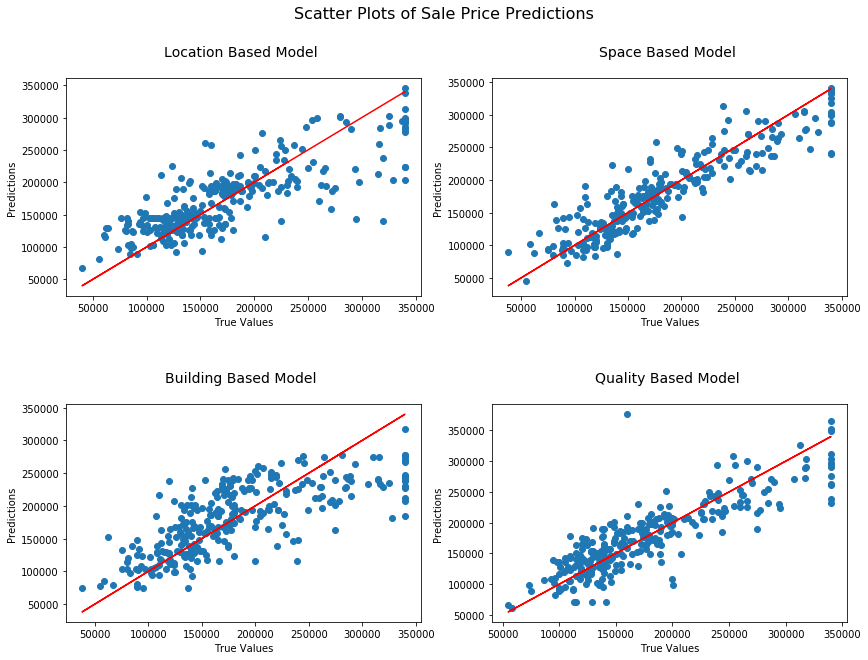

In [87]:
plt.figure(figsize=(14,10))
plt.suptitle('Scatter Plots of Sale Price Predictions', size = 16)

plt.subplot(2,2,1)
plt.title('Location Based Model \n', size = 14)
plt.scatter(y_test_loc, y_preds_loc)
plt.plot(y_test_loc, y_test_loc, color="red")
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.subplot(2,2,2)
plt.title('Space Based Model \n', size = 14)
plt.scatter(y_test_space, y_preds_space)
plt.plot(y_test_space, y_test_space, color="red")
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.subplot(2,2,3)
plt.title('Building Based Model \n', size = 14)
plt.scatter(y_test_building, y_preds_building)
plt.plot(y_test_building, y_test_building, color="red")
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.subplot(2,2,4)
plt.title('Quality Based Model \n', size = 14)
plt.scatter(y_test_quality, y_preds_quality)
plt.plot(y_test_quality, y_test_quality, color="red")
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.subplots_adjust(hspace = 0.5)
plt.show()

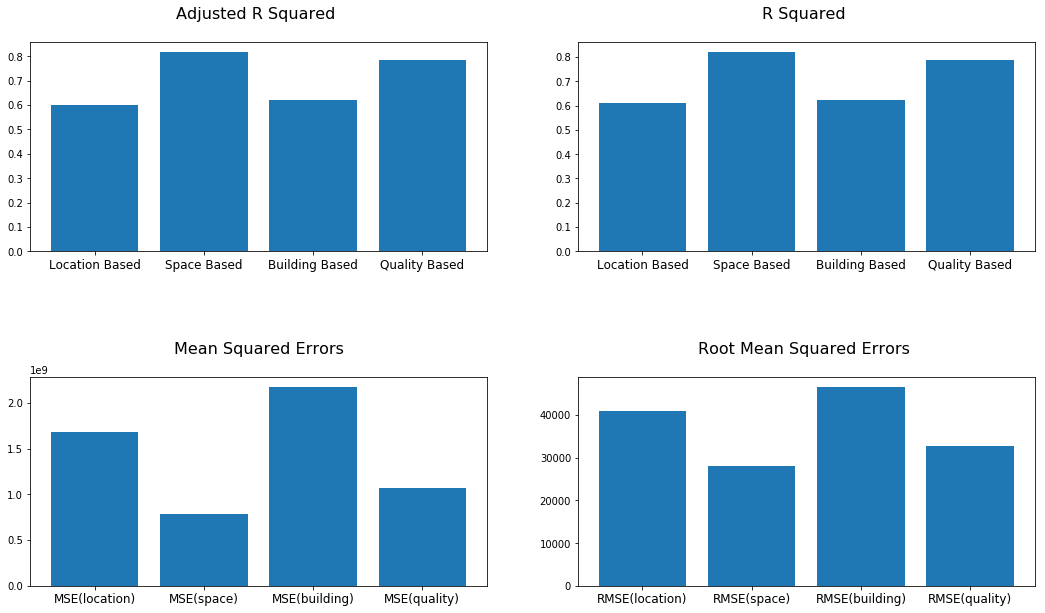

In [88]:
plt.figure(figsize = (18,10))

y_pos3 = np.arange(len(label3))
plt.subplot(221)
plt.bar(y_pos3, Rsquared_adj)
plt.xticks(y_pos3, label3, size = 12)
plt.title('Adjusted R Squared \n', size = 16)
plt.subplot(222)
plt.bar(y_pos3, Rsquared)
plt.xticks(y_pos3, label3, size = 12)
plt.title('R Squared \n', size = 16)

y_pos1 = np.arange(len(label1))
plt.subplot(223)
plt.bar(y_pos1, MSE_list)
plt.xticks(y_pos1, label1, size = 12)
plt.title('Mean Squared Errors\n', size = 16)
y_pos2 = np.arange(len(label2))
plt.subplot(224)
plt.bar(y_pos2, RMSE_list)
plt.xticks(y_pos2, label2, size = 12)
plt.title('Root Mean Squared Errors \n', size = 16)

plt.subplots_adjust(hspace = 0.6)
plt.show() 

* Space feature model seems most powerful and precise model at all. Both MSE and RMSE is obivously less than others. Quality model also looks good, following the space secondly. 

* Space based model is better again. There is a big difference with adjusted R Squared values. Quality based model is following here again, with a bit difference.  

### 7.2 Building Five New Models

We have created 5 models in this chapter, then visualized and compare them relative to each other.

#### How did we create Model 0, 1, 2, 3, 4?

* Model 0 : All variables included.
* Model 1 : After new variables have been created, i just looked correlations to sale price. The highest 50 have been chosen by looking the increasing adjusted R Squared plot.
* Model 2 : I created 4 diferent categories that define house's different features, then created 4 different OLS models. From these 4 models, significant variables are chosen and looked the correlations to sale price.The highest 20 have been chosen. 
* Model 3 : Insignificant features have been removed from Model 2 feature set by checking the p values.
* Model 4 : I manually reduced the number of features at Model 3 and created Model 4. The purpose is to look how a low dimensional model works.

We have combined features of four categories and created a new feature set.

In [89]:
# model 2 features
last_model_features = (X_quality.columns.tolist() + 
                       X_space.columns.tolist() + 
                       X_location.columns.tolist() + 
                       X_building.columns.tolist() +
                      ['SalePrice'])

In [90]:
last_train_new = last_train[last_model_features] # model 2

We have created two list for Model 1 and Model 2.

In [91]:
cor_1 = last_train.corr()
cor_list_1 = cor_1['SalePrice'].sort_values(ascending = False).index.tolist() # model 1 feature set

cor_2 = last_train_new.corr()
cor_list_2 = cor_2['SalePrice'].sort_values(ascending = False).index.tolist() # model 2 feature set

In [92]:
adjusted_old = []

for i in range(len(cor_list_1)):
    X_old_show = sm.add_constant(last_train[cor_list_1[1:i+1]])

    results_old_show = sm.OLS(last_train.SalePrice, X_old_show).fit()
    adjusted_old.append(results_old_show.rsquared_adj)
   
adjusted_new = []
for i in range(len(cor_list_2)):
    X_new_show = sm.add_constant(last_train[cor_list_2[1:i+1]])

    results_new_show = sm.OLS(last_train.SalePrice, X_new_show.astype(float)).fit()
    adjusted_new.append(results_new_show.rsquared_adj) 

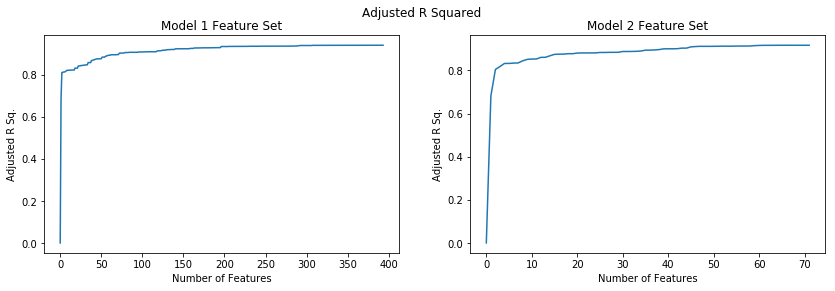

In [93]:
plt.figure(figsize=(14,4))
plt.suptitle('Adjusted R Squared')
plt.subplot(1,2,1)
plt.title('Model 1 Feature Set')
plt.xlabel('Number of Features')
plt.ylabel('Adjusted R Sq.')
plt.plot(adjusted_old)
plt.subplot(1,2,2)
plt.title('Model 2 Feature Set')
plt.xlabel('Number of Features')
plt.ylabel('Adjusted R Sq.')
plt.plot(adjusted_new)
plt.show()

We can see feature set of Model 2 is more advantageous. Reaching higher R squared faster. Because they are selected by some criterias.

#### Splitting validation(test) and train sets

In [94]:
X_train, X_test, y_train, y_test = train_test_split(last_train.drop(columns = ['SalePrice']), last_train.SalePrice,
                                                   test_size = 0.2,
                                                   random_state = 123)

In [95]:
# model 3 feature set list

selected_vars = ['YearBuilt',
 'YearRemodAdd',
 'Fireplaces',
 'RoofMatl_ClyTile',
 'Neighborhood_BrkSide',
 'Neighborhood_Crawfor',
 'Neighborhood_NridgHt',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'LotArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'KitchenAbvGr',
 'GarageCars',
 'WoodDeckSF',
 'AllSF',
 'GarageCars-2',
 'Condition2_PosN',
 'OveralQualCond',]

In [96]:
# model 0

X_zero_train = X_train
X_zero_test = X_test
y_zero_train = y_train
y_zero_test = y_test

# model 1

X_old_train = X_train[cor_list_1[1:51]] 
X_old_test = X_test[cor_list_1[1:51]] 
y_old_train = y_train
y_old_test = y_test

#model 2

X_new_train = X_train[cor_list_2[1:21]] 
X_new_test = X_test[cor_list_2[1:21]]
y_new_train = y_train
y_new_test = y_test

# model 3

X_selected_train = X_train[selected_vars]  
X_selected_test = X_test[selected_vars]
y_selected_train = y_train
y_selected_test = y_test

# model 4

X_selected_new_train = X_train[['YearBuilt', 'YearRemodAdd', 'Fireplaces','GarageQualCond', 'ExterQual', 'BsmtQual',
                          'OverallQual', 'LotArea']]                     
X_selected_new_test = X_test[['YearBuilt', 'YearRemodAdd', 'Fireplaces','GarageQualCond', 'ExterQual', 'BsmtQual',
                          'OverallQual', 'LotArea']]
y_selected_new_train = y_train
y_selected_new_test = y_test

In [97]:
# model 0

print('Model 0, Number of Features: ' + str(X_zero_train.shape[1]),
     '\n','--'*15)                                             
print("X_zero_train : " + str(X_zero_train.shape))
print("X_zero_test : " + str(X_zero_test.shape))
print("y_zero_train : " + str(y_zero_train.shape))
print("y_zero_test : " + str(y_zero_test.shape), '\n')

# model 1

print('Model 1, Number of Features: ' + str(X_old_train.shape[1]),
     '\n','--'*15)                                             
print("X_old_train : " + str(X_old_train.shape))
print("X_old_test : " + str(X_old_test.shape))
print("y_old_train : " + str(y_old_train.shape))
print("y_old_test : " + str(y_old_test.shape), '\n')

# model 2

print('Model 2, Number of Features: ' + str(X_new_train.shape[1]),
     '\n','--'*15)                                             
print("X_new_train : " + str(X_new_train.shape))
print("X_new_test : " + str(X_new_test.shape))
print("y_new_train : " + str(y_new_train.shape))
print("y_new_test : " + str(y_new_test.shape))

# model 3

print('Model 3, Number of Features: ' + str(X_selected_train.shape[1]),
     '\n','--'*15)                                             
print("X_selected_train : " + str(X_selected_train.shape))
print("X_selected_test : " + str(X_selected_test.shape))
print("y_selected_train : " + str(y_selected_train.shape))
print("y_selected_test : " + str(y_selected_test.shape), '\n')

# model 4

print('Model 4, Number of Features: ' + str(X_selected_new_train.shape[1]),
     '\n','--'*15)                                             
print("X_selected_new_train : " + str(X_selected_new_train.shape))
print("X_selected_new_test : " + str(X_selected_new_test.shape))
print("y_selected_new_train : " + str(y_selected_new_train.shape))
print("y_selected_new_test : " + str(y_selected_new_test.shape))

Model 0, Number of Features: 398 
 ------------------------------
X_zero_train : (1168, 398)
X_zero_test : (292, 398)
y_zero_train : (1168,)
y_zero_test : (292,) 

Model 1, Number of Features: 50 
 ------------------------------
X_old_train : (1168, 50)
X_old_test : (292, 50)
y_old_train : (1168,)
y_old_test : (292,) 

Model 2, Number of Features: 20 
 ------------------------------
X_new_train : (1168, 20)
X_new_test : (292, 20)
y_new_train : (1168,)
y_new_test : (292,)
Model 3, Number of Features: 20 
 ------------------------------
X_selected_train : (1168, 20)
X_selected_test : (292, 20)
y_selected_train : (1168,)
y_selected_test : (292,) 

Model 4, Number of Features: 8 
 ------------------------------
X_selected_new_train : (1168, 8)
X_selected_new_test : (292, 8)
y_selected_new_train : (1168,)
y_selected_new_test : (292,)


In [98]:
# Linear regression X_zero set - Model 0

X_zero_train = sm.add_constant(X_zero_train)
results_zero = sm.OLS(y_zero_train, X_zero_train.astype(float)).fit()
y_preds_zero_train = results_zero.predict(X_zero_train)

X_zero_test = sm.add_constant(X_zero_test, has_constant='add') 
y_preds_zero_test = results_zero.predict(X_zero_test)

results_zero_test = sm.OLS(y_zero_test, X_zero_test.astype(float)).fit() # test r

In [99]:
# Linear regression X_old set - Model 1

X_old_train = sm.add_constant(X_old_train)
results_old = sm.OLS(y_old_train, X_old_train).fit()
y_preds_old_train = results_old.predict(X_old_train)

X_old_test = sm.add_constant(X_old_test)
y_preds_old_test = results_old.predict(X_old_test)

results_old_test = sm.OLS(y_old_test, X_old_test).fit() # test r

In [100]:
# Linear regression X_new set - Model 2

X_new_train = sm.add_constant(X_new_train)
results_new = sm.OLS(y_new_train, X_new_train).fit()
y_preds_new_train = results_new.predict(X_new_train)

X_new_test = sm.add_constant(X_new_test)
y_preds_new_test = results_new.predict(X_new_test)

results_new_test = sm.OLS(y_new_test, X_new_test).fit() # test r

In [101]:
# Linear regression X_selected set - Model 3

X_selected_train = sm.add_constant(X_selected_train)
results_selected = sm.OLS(y_selected_train, X_selected_train).fit()
y_preds_selected_train = results_selected.predict(X_selected_train)

X_selected_test = sm.add_constant(X_selected_test)
y_preds_selected_test = results_selected.predict(X_selected_test)

results_selected_test = sm.OLS(y_selected_test, X_selected_test).fit() # test r

In [102]:
# Linear regression X_selected_new set - Model 4

X_selected_new_train = sm.add_constant(X_selected_new_train)
results_selected_new = sm.OLS(y_selected_new_train, X_selected_new_train).fit()
y_preds_selected_new_train = results_selected_new.predict(X_selected_new_train)

X_selected_new_test = sm.add_constant(X_selected_new_test)
y_preds_selected_new_test = results_selected_new.predict(X_selected_new_test)

results_selected_new_test = sm.OLS(y_selected_new_test, X_selected_new_test).fit() # test r

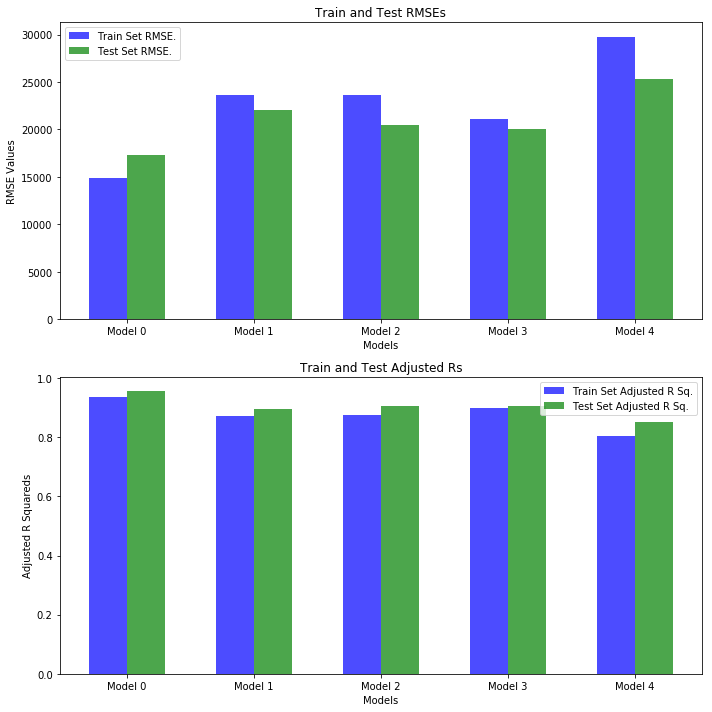

In [103]:
model_labels = ['Model 0', 'Model 1', 'Model 2', 'Model 3', 'Model 4']

model_adjusted_train = [results_zero.rsquared_adj,
                        results_old.rsquared_adj,
                       results_new.rsquared_adj,
                       results_selected.rsquared_adj,
                       results_selected_new.rsquared_adj]
model_adjusted_test = [results_zero_test.rsquared_adj,
                       results_old_test.rsquared_adj,
                       results_new_test.rsquared_adj,
                       results_selected_test.rsquared_adj,
                       results_selected_new_test.rsquared_adj]

model_rmse_train = [rmse(y_zero_train, y_preds_zero_train), 
                    rmse(y_old_train, y_preds_old_train),
                    rmse(y_new_train, y_preds_new_train),
                    rmse(y_selected_train, y_preds_selected_train),
                    rmse(y_selected_new_train, y_preds_selected_new_train)]

model_rmse_test =  [rmse(y_zero_test, y_preds_zero_test), 
                    rmse(y_old_test, y_preds_old_test),
                    rmse(y_new_test, y_preds_new_test),
                    rmse(y_selected_test, y_preds_selected_test),
                    rmse(y_selected_new_test, y_preds_selected_new_test)]

plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
n_groups = 5
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.7
 
rects1 = plt.bar(index, model_rmse_train, bar_width,
alpha=opacity,
color='b',
label='Train Set RMSE.')
 
rects2 = plt.bar(index + bar_width, model_rmse_test, bar_width,
alpha=opacity,
color='g',
label='Test Set RMSE.')
 
plt.xlabel('Models')
plt.ylabel('RMSE Values')
plt.title('Train and Test RMSEs')
plt.xticks(index + bar_width/2, ('Model 0', 'Model 1', 'Model 2', 'Model 3', 'Model 4'))
plt.legend()

plt.subplot(2,1,2)
rects1 = plt.bar(index, model_adjusted_train, bar_width,
alpha=opacity,
color='b',
label='Train Set Adjusted R Sq.')
 
rects2 = plt.bar(index + bar_width, model_adjusted_test, bar_width,
alpha=opacity,
color='g',
label='Test Set Adjusted R Sq.')
 
plt.xlabel('Models')
plt.ylabel('Adjusted R Squareds')
plt.title('Train and Test Adjusted Rs')
plt.xticks(index + bar_width/2, ('Model 0', 'Model 1', 'Model 2', 'Model 3', 'Model 4'))
plt.legend()

plt.tight_layout()
plt.show()

#### Model 0 :
* Highest Adjusted R Square
* 398 features
* Lowest RMSE values
* Average overfit

#### Model 1:
* Good Adjusted R Square, lower than Model 0
* 50 features
* Higher RMSE than Model 0
* Lower overfit than Model 0

#### Model 2:
* Good Adjusted R Square, same with Model 1
* 20 features
* Average RMSE, same with Model 1
* Higher overfit than Model 1

#### Model 3:
* Good Adjusted R Square, same with Model 1 and Model 2
* 20 features
* Low RMSE
* Lowest overfit

#### Model 4:
* Lowest Adjusted R Square
* 8 Features
* Highest RMSE
* Highest overfit

Obviously seen, Model 3 is the best. It has low number of features, good adjusted R sq., low RMSE(error) and lowest overfit comparing to others. We are going to improve that model in later chapters.

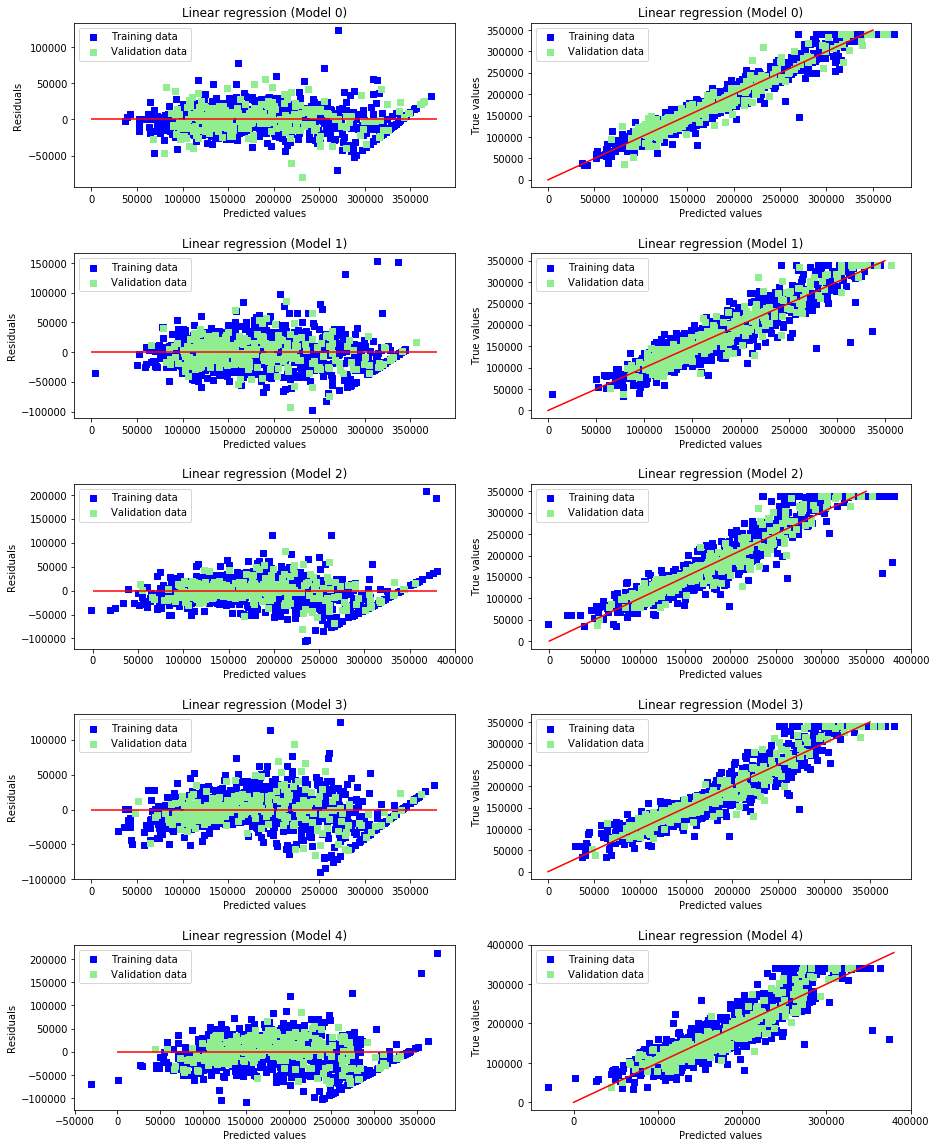

In [104]:
# Plot residuals

plt.figure(figsize = (15,20))
plt.subplots_adjust(hspace = 0.4)

# Model 0 

plt.subplot(5,2,1)
plt.scatter(y_preds_zero_train, y_preds_zero_train - y_zero_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_zero_test, y_preds_zero_test - y_zero_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 0)")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 380000, color = "red")

plt.subplot(5,2,2)
plt.scatter(y_preds_zero_train, y_zero_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_zero_test, y_zero_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 0)")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.legend(loc = "upper left")
plt.plot([0, 350000], [0, 350000], c = "red")

# Model 1

plt.subplot(5,2,3)
plt.scatter(y_preds_old_train, y_preds_old_train - y_old_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_old_test, y_preds_old_test - y_old_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 1)")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 380000, color = "red")

plt.subplot(5,2,4)
plt.scatter(y_preds_old_train, y_old_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_old_test, y_old_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 1)")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.legend(loc = "upper left")
plt.plot([0, 350000], [0, 350000], c = "red")

# Model 2

plt.subplot(5,2,5)
plt.scatter(y_preds_new_train, y_preds_new_train - y_new_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_new_test, y_preds_new_test - y_new_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 2)")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 380000, color = "red")

plt.subplot(5,2,6)
plt.scatter(y_preds_new_train, y_new_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_new_test, y_new_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 2)")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.legend(loc = "upper left")
plt.plot([0, 350000], [0, 350000], c = "red")

# Model 3

plt.subplot(5,2,7)
plt.scatter(y_preds_selected_train, y_preds_selected_train - y_selected_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_selected_test, y_preds_selected_test - y_selected_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 3)")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 380000, color = "red")

plt.subplot(5,2,8)
plt.scatter(y_preds_selected_train, y_selected_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_selected_test, y_selected_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 3)")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.legend(loc = "upper left")
plt.plot([0, 350000], [0, 350000], c = "red")

# Model 4

plt.subplot(5,2,9)
plt.scatter(y_preds_selected_new_train, y_preds_selected_new_train - y_selected_new_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_selected_new_test, y_preds_selected_new_test - y_selected_new_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 4)")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 350000, color = "red")

plt.subplot(5,2,10)
plt.scatter(y_preds_selected_new_train, y_selected_new_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_selected_new_test, y_selected_new_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 4)")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.legend(loc = "upper left")
plt.plot([0, 380000], [0, 380000], c = "red")
plt.show()

At the residual plots, we need to look at the distribution of errors. It must tend to be distributed homogeneous. If not, there may be heteroscedasticity. I see in all that five models, when the house prices increased, errors tend to be scattered linearly. We need to solve that and achieve homoscedasticity. Until here, the best model we have is Model 3 for now. Let's improve it.

### 8. Advanced Models

### 8.1 Improving Model 3
#### We have built Model 5 and Model 6 to improve Model 3. How did we build them?

* Model 5 : We have built Model 5 to solve heteroscedasticity problem that detected on residual plots. Difference between Model 3 and Model 5 is, the dependent variable has been log transformed.
* Model 6 : We couldn't solve heteroscedasticity at Model 5. This time, We used not winsorized target variable and We have made log transformation on it. Then heteroscedasticity dissapeared and that is fine.

We checked out the distributions of independent variable at four title, seen on the plots below.

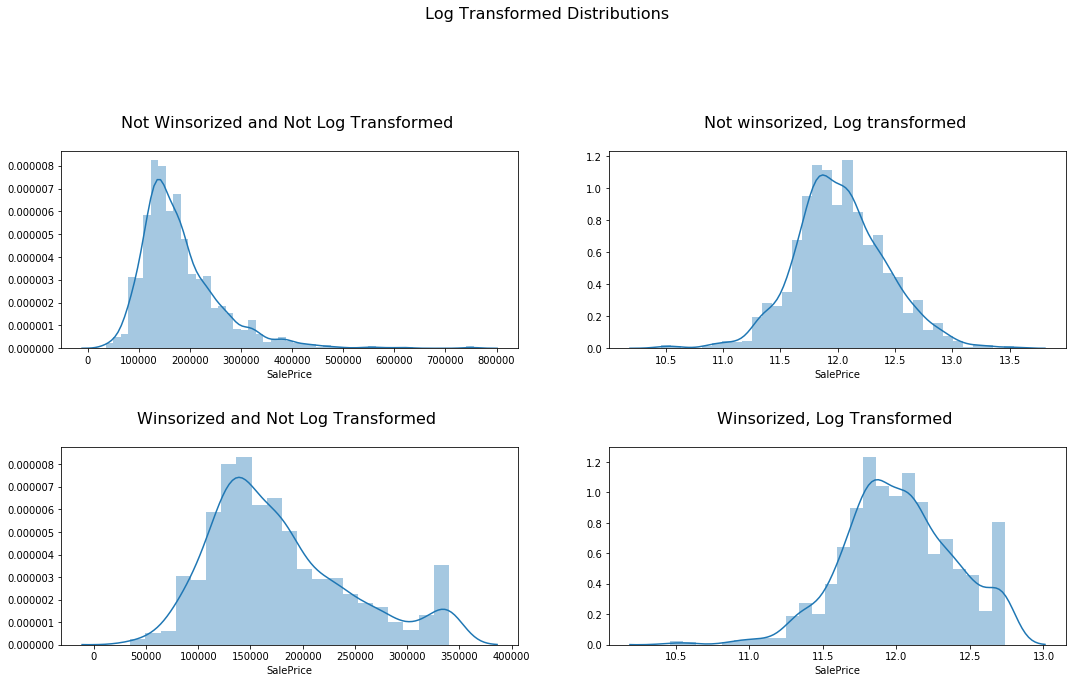

In [105]:
plt.figure(figsize = (18,20))
plt.subplot(4,2,1)
plt.title('Not Winsorized and Not Log Transformed \n', size = 16)
sns.distplot(train_1["SalePrice"])
plt.subplot(4,2,2)
plt.title('Not winsorized, Log transformed \n', size = 16)
sns.distplot(np.log1p(train_1["SalePrice"]))
plt.subplot(4,2,3)
plt.title('Winsorized and Not Log Transformed \n', size = 16)
sns.distplot(last_train['SalePrice'])
plt.subplot(4,2,4)
plt.title('Winsorized, Log Transformed \n', size = 16)
sns.distplot(np.log1p(last_train["SalePrice"]))
plt.suptitle('Log Transformed Distributions', size = 16)
plt.subplots_adjust(hspace = 0.5)
plt.show()

At the both winsorized and not winsorized variable distributions, we can see skewness clearly. To handle that, we can try log transormation on target variable. The closest distribution to normal distribution is at upper right plot. Not winsorized and log transformed. We will evaluate that in Model 6 later. 

#### Model 5

I used same variables with Model 3 here. But, I applied log transformation on dependent sale price variable.

In [106]:
# Garagecars-2 and BsmtFinSF1 are removed

selected_vars_new = ['YearBuilt',
 'YearRemodAdd',
 'Fireplaces',
 'RoofMatl_ClyTile',
 'Neighborhood_BrkSide',
 'Neighborhood_Crawfor',
 'Neighborhood_NridgHt',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'LotArea',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'KitchenAbvGr',
 'GarageCars',
 'WoodDeckSF',
 'AllSF',
 'Condition2_PosN',
 'OveralQualCond',]

In [107]:
# model 3 feature set, target variable (sale price) is log transformed

X_selected_train_log = X_train[selected_vars_new]                                               
X_selected_test_log = X_test[selected_vars_new]
y_selected_train_log = np.log1p(y_train)
y_selected_test_log = np.log1p(y_test)

In [108]:
# Linear regression X_selected set

X_selected_train_log = sm.add_constant(X_selected_train_log)
results_selected_log = sm.OLS(y_selected_train_log, X_selected_train_log).fit()
y_preds_selected_train_log = results_selected_log.predict(X_selected_train_log)

X_selected_test_log = sm.add_constant(X_selected_test_log)
y_preds_selected_test_log = results_selected_log.predict(X_selected_test_log)

results_selected_test_log = sm.OLS(y_selected_test_log, X_selected_test_log).fit() # test r

In [109]:
results_selected_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     528.5
Date:                Fri, 10 May 2019   Prob (F-statistic):               0.00
Time:                        15:30:03   Log-Likelihood:                 765.36
No. Observations:                1168   AIC:                            -1493.
Df Residuals:                    1149   BIC:                            -1397.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.0476      0.471      4.350      0.000       1.124       2.971
YearBuilt                0.0033      0.000     17.648      0.000       0.003       0.004
YearRemodAdd             0.0011      0.000      4.081      0.000       0.001       0.002
Fireplaces               0.0341      0.007      4.714      0.000       0.020       0.048
RoofMatl_ClyTile        -1.0315      0.128     -8.071      0.000      -1.282      -0.781
Neighborhood_BrkSide     0.0574      0.020      2.830      0.005       0.018       0.097
Neighborhood_Crawfor     0.1519      0.021      7.232      0.000       0.111       0.193
Neighborhood_NridgHt     0.0366      0.019      1.891      0.059      -0.001       0.075
Neighborhood_Somerst     0.0881      0.018      5.014      0.000       0.054       0.123
Neighborhood_StoneBr     0.0679      0.028      2.406      0.016       0.013       0.123
LotArea               1.052e-05    1.3e-06      8.101      0.000    7.97e-06    1.31e-05
BsmtFinSF2           -4.979e-05   2.37e-05     -2.101      0.036   -9.63e-05   -3.29e-06
BsmtUnfSF            -9.324e-05   9.89e-06     -9.424      0.000      -0.000   -7.38e-05
KitchenAbvGr            -0.0823      0.019     -4.433      0.000      -0.119      -0.046
GarageCars               0.0566      0.007      8.247      0.000       0.043       0.070
WoodDeckSF            9.856e-05   3.43e-05      2.871      0.004    3.12e-05       0.000
AllSF                    0.0003   8.62e-06     29.618      0.000       0.000       0.000
Condition2_PosN         -0.5167      0.091     -5.703      0.000      -0.695      -0.339
OveralQualCond           0.0593      0.003     19.129      0.000       0.053       0.065
==============================================================================
Omnibus:                      409.443   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2677.281
Skew:                          -1.461   Prob(JB):                         0.00
Kurtosis:                       9.817   Cond. No.                     1.38e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model 6

I used same variables with Model 3 and Model 5. I applied log transformation on dependent variable again. The dependent variable, sale price, is not winsorized now. To try out and check if heteroscedasticity will be solved.

In [110]:
X_one_train, X_one_test, y_one_train, y_one_test = train_test_split(train_1.drop(columns = ['SalePrice']),
                                                                   train_1.SalePrice,
                                                                   test_size = 0.2,
                                                                   random_state = 123) 

In [111]:
X_one_train = X_train[selected_vars_new]                                               
X_one_test = X_test[selected_vars_new]

In [112]:
# Linear regression X_selected set

X_selected_train_one = sm.add_constant(X_one_train)
results_selected_one = sm.OLS(np.log1p(y_one_train) , X_selected_train_one).fit()
y_preds_selected_train_one = results_selected_one.predict(X_selected_train_one)

X_selected_test_one = sm.add_constant(X_one_test)
y_preds_selected_test_one = results_selected_one.predict(X_selected_test_one)

results_selected_test_one = sm.OLS(np.log1p(y_one_test), X_selected_test_one).fit()

In [113]:
results_selected_one.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     572.5
Date:                Fri, 10 May 2019   Prob (F-statistic):               0.00
Time:                        15:30:04   Log-Likelihood:                 747.98
No. Observations:                1168   AIC:                            -1458.
Df Residuals:                    1149   BIC:                            -1362.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1902      0.478      4.584      0.000       1.253       3.128
YearBuilt                0.0033      0.000     17.435      0.000       0.003       0.004
YearRemodAdd             0.0009      0.000      3.567      0.000       0.000       0.001
Fireplaces               0.0340      0.007      4.636      0.000       0.020       0.048
RoofMatl_ClyTile        -1.0942      0.130     -8.435      0.000      -1.349      -0.840
Neighborhood_BrkSide     0.0653      0.021      3.173      0.002       0.025       0.106
Neighborhood_Crawfor     0.1444      0.021      6.774      0.000       0.103       0.186
Neighborhood_NridgHt     0.0940      0.020      4.783      0.000       0.055       0.133
Neighborhood_Somerst     0.0865      0.018      4.852      0.000       0.052       0.121
Neighborhood_StoneBr     0.1205      0.029      4.207      0.000       0.064       0.177
LotArea               1.174e-05   1.32e-06      8.907      0.000    9.15e-06    1.43e-05
BsmtFinSF2            -6.81e-05   2.41e-05     -2.831      0.005      -0.000   -2.09e-05
BsmtUnfSF               -0.0001      1e-05    -10.751      0.000      -0.000   -8.83e-05
KitchenAbvGr            -0.0879      0.019     -4.664      0.000      -0.125      -0.051
GarageCars               0.0580      0.007      8.330      0.000       0.044       0.072
WoodDeckSF            9.852e-05   3.48e-05      2.827      0.005    3.01e-05       0.000
AllSF                    0.0003   8.74e-06     31.423      0.000       0.000       0.000
Condition2_PosN         -0.5377      0.092     -5.846      0.000      -0.718      -0.357
OveralQualCond           0.0619      0.003     19.695      0.000       0.056       0.068
==============================================================================
Omnibus:                      352.943   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2281.037
Skew:                          -1.233   Prob(JB):                         0.00
Kurtosis:                       9.387   Cond. No.                     1.38e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

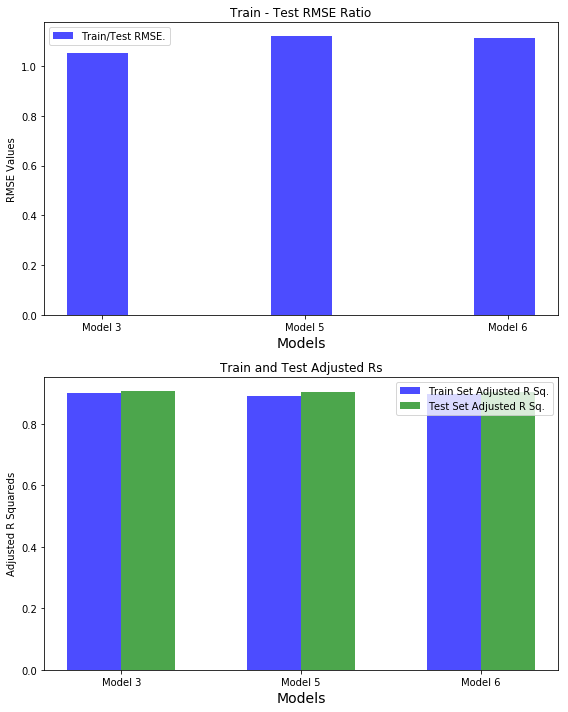

In [114]:
model_labels = ['Model 3', 'Model 5', 'Model 6']

mod_adj_train = [results_selected.rsquared_adj,
                 results_selected_log.rsquared_adj,
                 results_selected_one.rsquared_adj]


mod_adj_test = [results_selected_test.rsquared_adj,
                results_selected_test_log.rsquared_adj,
                results_selected_test_one.rsquared_adj]

mod_rmse = [rmse(y_selected_train, y_preds_selected_train)/rmse(y_selected_test, y_preds_selected_test),
            rmse(y_selected_train_log, y_preds_selected_train_log)/rmse(y_selected_test_log, y_preds_selected_test_log),
            rmse(np.log1p(y_train), y_preds_selected_train_one)/rmse(np.log1p(y_test), y_preds_selected_test_one)]


n_groups = 3
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.7

plt.figure(figsize = (8,10))
plt.subplot(2,1,1)

 
rects1 = plt.bar(index, mod_rmse, bar_width,
alpha=opacity,
color='b',
label='Train/Test RMSE.')

 
plt.xlabel('Models', size = 14)
plt.ylabel('RMSE Values')
plt.title('Train - Test RMSE Ratio')
plt.xticks(index + bar_width/16, ('Model 3', 'Model 5', 'Model 6'))
plt.legend()

plt.subplot(2,1,2)
rects1 = plt.bar(index, mod_adj_train, bar_width,
alpha=opacity,
color='b',
label='Train Set Adjusted R Sq.')
 
rects2 = plt.bar(index + bar_width, mod_adj_test, bar_width,
alpha=opacity,
color='g',
label='Test Set Adjusted R Sq.')
 
plt.xlabel('Models',size = 14)
plt.ylabel('Adjusted R Squareds')
plt.title('Train and Test Adjusted Rs')
plt.xticks(index + bar_width/2, ('Model 3', 'Model 5', 'Model 6'))
plt.legend()
plt.subplots_adjust(hspace = 0.4)

plt.tight_layout()
plt.show()

Top plot shows, Tran-Test RMSE ratios slightly differ but not too much. So we don't have to care about overfitting. Bottom plot says about Adjusted R Squareds, they are almost same and no overfitting seen at anyone.

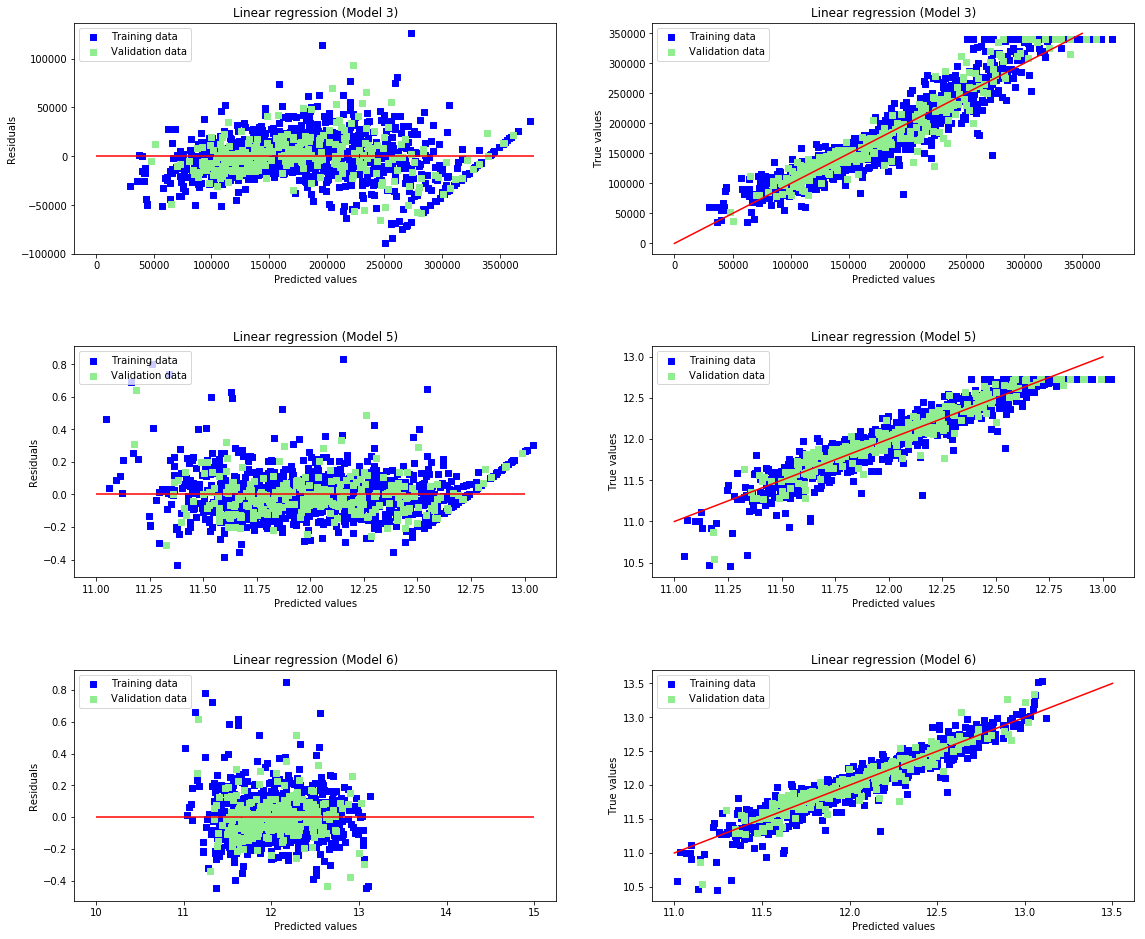

In [115]:
plt.figure(figsize = (19,34))

# Model 3

plt.subplot(6,2,1)
plt.scatter(y_preds_selected_train, y_preds_selected_train - y_selected_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_selected_test, y_preds_selected_test - y_selected_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 3)")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 380000, color = "red")

plt.subplot(6,2,2)
plt.scatter(y_preds_selected_train, y_selected_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_selected_test, y_selected_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 3)")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.legend(loc = "upper left")
plt.plot([0, 350000], [0, 350000], c = "red")

# Model 5

plt.subplot(6,2,3)
plt.scatter(y_preds_selected_train_log, y_preds_selected_train_log - y_selected_train_log, 
            c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_selected_test_log, y_preds_selected_test_log - y_selected_test_log, 
            c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 5)")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 11, xmax = 13, color = "red")

plt.subplot(6,2,4)
plt.scatter(y_preds_selected_train_log, y_selected_train_log, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_selected_test_log, y_selected_test_log, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 5)")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.legend(loc = "upper left")
plt.plot([11, 13], [11, 13], c = "red")

# Model 6

plt.subplot(6,2,5)
plt.scatter(y_preds_selected_train_one, y_preds_selected_train_one - np.log1p(y_one_train), 
            c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_selected_test_one, y_preds_selected_test_one - np.log1p(y_one_test), 
            c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 6)")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10, xmax = 15, color = "red")

plt.subplot(6,2,6)
plt.scatter(y_preds_selected_train_one, np.log1p(y_one_train), c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_selected_test_one, np.log1p(y_one_test), c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 6)")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.legend(loc = "upper left")
plt.plot([11, 13.5], [11, 13.5], c = "red")

plt.subplots_adjust(hspace = 0.4)
plt.show()

In [116]:
df_mod356 = pd.read_csv('model356.csv')
df_mod356

,Model,Num. Of Features,Train Adj. R,Test Adj. R,Train RMSE,Test RMSE
0,Model 3,20,"0,9","0,907",21135,20076
1,Model 5,18,"0,89","0,904","0,125","0,112"
2,Model 6,18,"0,898","0,905","0,128","0,115"


At the residual plots above, residuals of Model 3 and Model 5 are not distributed homogenous. Especially, hihgher values of sale price, estimations are differing. That means, we can not predict high priced houses succesfully. That is why we build Model 6. In Model 6, we have made log transformation on Sale Price(not winsorized this time) variable. At the Model 6 plots, heteroscedasticity dissapeared.  

### 8.2 Ridge and Lasso Regularizations

In this part, we have built two different model with using regularization methods. Ridge and Lasso are types of linear regression.

In [117]:
# split data for ridge and lasso

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(last_train.drop(columns = ['SalePrice']),
                                                                           np.log1p(train_1.SalePrice),
                                                                           test_size = 0.2,
                                                                           random_state = 456)
X_train_ridge = X_train_reg
X_test_ridge = X_test_reg
y_train_ridge = y_train_reg
y_test_ridge = y_test_reg

X_train_lasso = X_train_reg
X_test_lasso = X_test_reg
y_train_lasso = y_train_reg
y_test_lasso = y_test_reg

In [118]:
# rmse calculator with five fold cross validation method 

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, last_train.drop(columns = ['SalePrice']), 
                                   np.log1p(train_1.SalePrice), scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [119]:
model_ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

model_lasso = Lasso()
alphas_2 = [0.00038,0.00039, 0.0004, 0.00041,0.00042, 0.00043, 0.00044, 0.00045, 0.00046, 0.00047, 0.00048]

cv_lasso = [rmse_cv(Lasso(alpha = alpha)).mean() for alpha in alphas_2]

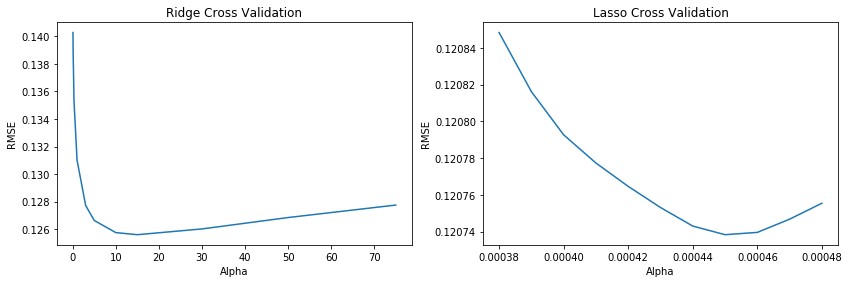

In [120]:
plt.figure(figsize = (14,9))

plt.subplot(2,2,1)
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Ridge Cross Validation")

plt.xlabel("Alpha")
plt.ylabel("RMSE")

plt.subplot(2,2,2)
cv_lasso = pd.Series(cv_lasso, index = alphas_2)
cv_lasso.plot(title = "Lasso Cross Validation")

plt.xlabel("Alpha")
plt.ylabel("RMSE")

plt.show()

With cross validation we can see lowest mean rmse for each alpha value. For Ridge, optimum alpha parameter is 15 and for Lasso, it is about 0.00045. We have used these alpha values.

In [121]:
ridge_reg = Ridge(alpha = 15)
ridge_reg.fit(X_train_ridge, y_train_ridge)

y_preds_train_ridge = ridge_reg.predict(X_train_ridge)
y_preds_test_ridge = ridge_reg.predict(X_test_ridge)   

In [122]:
lasso_reg = Lasso(alpha = 0.00045)
lasso_reg.fit(X_train_lasso, y_train_lasso)

y_preds_train_lasso = lasso_reg.predict(X_train_lasso)
y_preds_test_lasso = lasso_reg.predict(X_test_lasso)    

In [123]:
mod_labels = ['Model 6', 'Model Ridge', 'Model Lasso']

model_score_train = [results_selected_one.rsquared_adj,
                        ridge_reg.score(X_train_ridge, y_train_ridge),
                       lasso_reg.score(X_train_lasso, y_train_lasso)]

model_score_test = [results_selected_test_one.rsquared_adj,
                       ridge_reg.score(X_test_ridge, y_test_ridge),
                       lasso_reg.score(X_test_lasso, y_test_lasso)]

mod_rmse_train = [rmse(np.log1p(y_train), y_preds_selected_train_one), 
                    rmse(y_train_ridge, y_preds_train_ridge),
                    rmse(y_train_lasso, y_preds_train_lasso)]

mod_rmse_test =  [rmse(np.log1p(y_test), y_preds_selected_test_one), 
                    rmse(y_test_ridge, y_preds_test_ridge),
                    rmse(y_test_lasso, y_preds_test_lasso)]

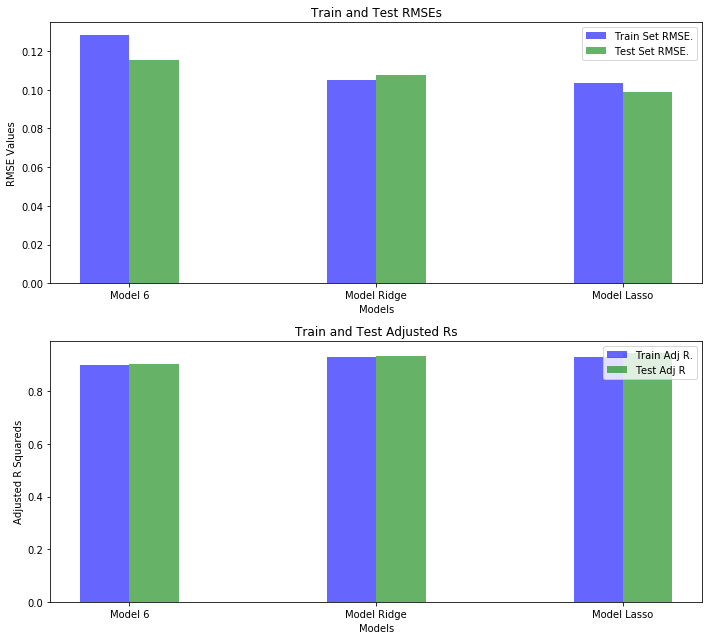

In [124]:
plt.figure(figsize = (10,9))
plt.subplot(2,1,1)
n_groups = 3
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.6
 
rects1 = plt.bar(index, mod_rmse_train, bar_width,
alpha=opacity,
color='b',
label='Train Set RMSE.')
 
rects2 = plt.bar(index + bar_width, mod_rmse_test, bar_width,
alpha=opacity,
color='g',
label='Test Set RMSE.')
 
plt.xlabel('Models')
plt.ylabel('RMSE Values')
plt.title('Train and Test RMSEs')
plt.xticks(index + bar_width/2, ('Model 6', 'Model Ridge', 'Model Lasso'))
plt.legend()

plt.subplot(2,1,2)
rects1 = plt.bar(index, model_score_train, bar_width,
alpha=opacity,
color='b',
label='Train Adj R.')
 
rects2 = plt.bar(index + bar_width, model_score_test, bar_width,
alpha=opacity,
color='g',
label='Test Adj R')
 
plt.xlabel('Models')
plt.ylabel('Adjusted R Squareds')
plt.title('Train and Test Adjusted Rs')
plt.xticks(index + bar_width/2, ('Model 6', 'Model Ridge', 'Model Lasso'))
plt.legend()

plt.tight_layout()

In [158]:
coef = pd.Series(lasso_reg.coef_, index = X_train_reg.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 143 variables and eliminated the other 255 variables


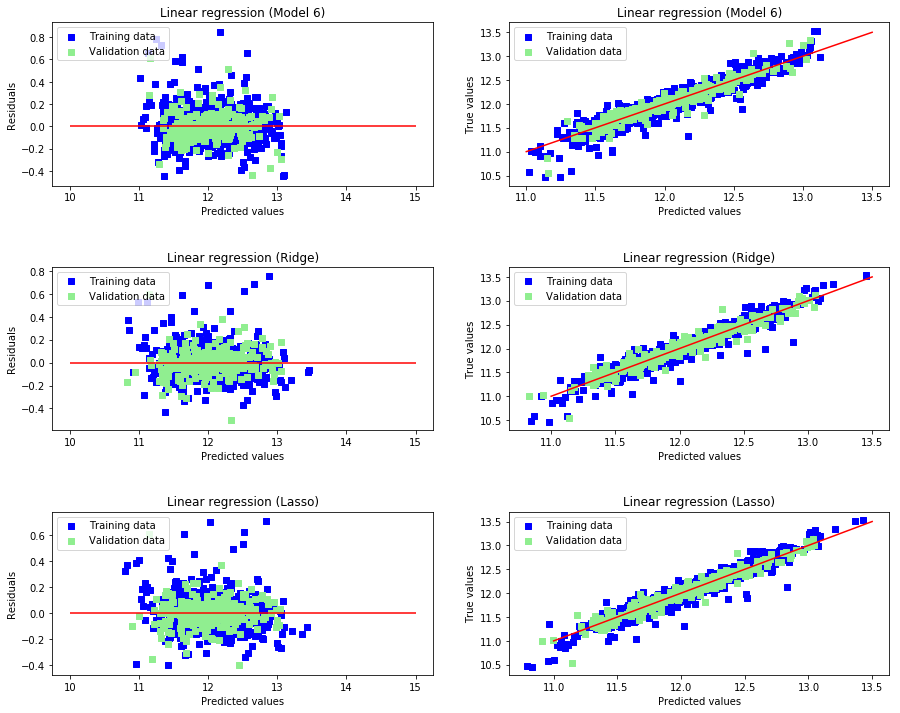

In [126]:
plt.figure(figsize = (15,12))

# Model 6 

plt.subplot(3,2,1)
plt.scatter(y_preds_selected_train_one, y_preds_selected_train_one - np.log1p(y_one_train), 
            c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_selected_test_one, y_preds_selected_test_one - np.log1p(y_one_test), 
            c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 6)")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10, xmax = 15, color = "red")

plt.subplot(3,2,2)
plt.scatter(y_preds_selected_train_one, np.log1p(y_one_train), c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_selected_test_one, np.log1p(y_one_test), c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Model 6)")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.legend(loc = "upper left")
plt.plot([11, 13.5], [11, 13.5], c = "red")

# Model Ridge

plt.subplot(3,2,3)
plt.scatter(y_preds_train_ridge, y_preds_train_ridge - y_train_ridge, 
            c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_test_ridge, y_preds_test_ridge - y_test_ridge, 
            c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Ridge)")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10, xmax = 15, color = "red")

plt.subplot(3,2,4)
plt.scatter(y_preds_train_ridge, y_train_ridge, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_test_ridge, y_test_ridge, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Ridge)")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.legend(loc = "upper left")
plt.plot([11, 13.5], [11, 13.5], c = "red")

# Model Lasso

plt.subplot(3,2,5)
plt.scatter(y_preds_train_lasso, y_preds_train_lasso - y_train_lasso, 
            c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_test_lasso, y_preds_test_lasso - y_test_lasso, 
            c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Lasso)")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10, xmax = 15, color = "red")

plt.subplot(3,2,6)
plt.scatter(y_preds_train_lasso, y_train_lasso, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_preds_test_lasso, y_test_lasso, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression (Lasso)")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.legend(loc = "upper left")
plt.plot([11, 13.5], [11, 13.5], c = "red")

plt.subplots_adjust(hspace = 0.5)
plt.show()

In [127]:
df_models = pd.read_csv('model_info.csv')
df_models

,Models,Num. Of Features,Train Adj. R Sq.,Test Adj. R Sq.,Train RMSE,Test RMSE
0,Model 0,398,"0,94","0,95",14848,17280
1,Model 1,50,"0,87","0,89",23640,22043
2,Model 2,20,"0,87","0,905",23679,20482
3,Model 3,20,"0,9","0,907",21135,20076
4,Model 4,8,"0,8","0,85",29800,25369
5,Model 5,18,"0,89","0,9","0,125","0,112"
6,Model 6,18,"0,9","0,9","0,128","0,115"
7,Model Lasso,143,"0,93","0,94","0,103","0,1"
8,Model Ridge,398,"0,93","0,93","0,105","0,107"


Here we have compared Model 6, Model Ridge and Model Lasso. 

* For R Sq. and RMSE values, Model Lasso is better than Model 6 and Model Ridge. 
* Obviously seen, Model Lasso is working better than Model Ridge.
* For multi dimensionalities, Model 6 has less number of features. It means it will work faster than others.
* For overfitting, there are no considerable overfitting seen at any of them, but Model 6 is a bit more overfitted than others.

### 9. Results

Throughout the project, we worked with data from the city of Ames. At first, we had only data. As a result of the project, we now have a machine learning model created using this data. With this model we can estimate the prices of houses for sale in this city. What were the stages of the project from the beginning to the end?

* Problem defined
* Data examined
* Decided which model to use
* Data prepared to use in models
* Models built
* Disruptions checked
* Models built again
* Performance of models analysed and visualized
* Models compared

A way to reach the best models followed:

* At the section of Model Building, from five models, Models(0,1,2,3,4), we determined Model 3 as the best model for now.
* After Model 3 choosen, we decided to improve it because of heteroscedasticity.
* Model 5 and 6 built.
* Model 6 is the best for now.
* Model Ridge and Lasso built.

At the end of section 8, a quick comparison was done. According to that, we can say that Model Lasso is corresponding the best results. 

* In Model Lasso, explained variance ration i 94%.
* 143 variables included.
* RMSE is approximately 0.1
* Model's validation and train scores and rmses are very close to each other.

There may be a concern about number of features but it does not have to be. Because in that subject, computing rate is not that important. We have enough time to predict. Also we will not have to face extreme numbers of houses waiting for pricing. Except this, all statistics are very good and no overfitting seen. 

### 10. Appendix

In [164]:
coef_new = np.e**coef - 1

In [165]:
coef_new.sort_values(ascending = False)

Neighborhood_Crawfor     0.118
Neighborhood_StoneBr     0.099
Functional_Typ           0.076
Neighborhood_NridgHt     0.070
Exterior1st_BrkFace      0.060
Condition1_Norm          0.049
ExterCond_3              0.042
RoofMatl_WdShngl         0.042
Neighborhood_NoRidge     0.040
LotConfig_CulDSac        0.037
Neighborhood_Somerst     0.035
BsmtQual_5               0.034
Neighborhood_BrkSide     0.031
AllSF-Sq                 0.031
MSZoning_FV              0.028
Neighborhood_ClearCr     0.027
Foundation_PConc         0.024
OveralQualCond           0.020
PavedDrive_Y             0.018
OverallQual              0.017
BsmtCond                 0.016
HeatingQC_5              0.016
SaleCondition_Normal     0.015
AllFlrsSF-Sq             0.015
Exterior1st_MetalSd      0.015
GarageType_Detchd        0.014
GarageType_Attchd        0.012
LotConfig_Corner         0.012
LandContour_HLS          0.011
BsmtExposure             0.010
                         ...  
BsmtFinType1_Unf        -0.007
BsmtFinT